# Indian Start-up Economy Analysis

## 1. Business understanding
For Start-up businesses, access to external funding is very crucial as it provides enough financial cushion to establish business ideas, sustain survival of the businesess and facilitate their growth.
According to research, about 90% of start-ups are bound to fold up within the first operational year owing to reasons such us inadequate funding, insufficient research, working in the wrong market amongst others. 
This project seeks to conduct a thorough analysis(research) into funding within the Indian Start-up ecosystem from data gathered in the years 2018 to 2021. 
In the end, the trends in funding revealed should inform the best course of action for a new team hoping to venture into this ecosystem with added advantage(s) over its competitors.  

- https://www.investopedia.com/articles/personal-finance/040915/how-many-startups-fail-and-why.asp#:~:text=Key%20Takeaways&text=According%20to%20business%20owners%2C%20reasons,the%20work%2C%20and%20not%20quitting.

### 1.1. Hypotheses
#### location
- H0: The location of the start-up has no impact on the volume of funding received.
- H1: The location of the start-up has an impact on the volume of funding received.

#### Time
- H0: Average funding volume increases every year.
- H1: Average funding volume does not increase every year

#### Stage of start up
- H0: The stage of the start-up informs the amount of funding received.
- H1: The stage of the start-up does not inform the amount of funding received.

### 1.2. Importation

In [184]:
# import necessary packages
# to build connection with external database
import pyodbc as pc 

# to access content in .env
from dotenv import dotenv_values

# for data manipulation
import pandas as pd
import numpy as np
import re

#import modules 
import matplotlib.pyplot as plt
import seaborn as sb

### 1.3. Loading data

In [185]:
# save hidden content in variables
cred = dotenv_values('.env')

# extract individual values from cred dictionary
db = cred['DATABASE']
host = cred['SERVER']
user = cred['USERNAME']
password = cred['PASSWORD']

# build connection_string
connection_string = f"DRIVER={{SQL Server}};SERVER={host};DATABASE={db};UID={user};PWD={password}"

# build connection
nection = pc.connect(connection_string)

#### 2020 

In [186]:
# write sql queries
query1 = "SELECT * FROM dbo.LP1_startup_funding2020"

# load 2020 funding data
df_2020 = pd.read_sql_query(query1, nection)
df_2020.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_18868\241083242.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2020 = pd.read_sql_query(query1, nection)


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,None
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,None
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,None
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,None


#### 2021

In [187]:
query2 = "Select * from dbo.LP1_startup_funding2021"

# load 2021 funding data
df_2021 = pd.read_sql_query(query2, nection)
df_2021


C:\Users\USER\AppData\Local\Temp\ipykernel_18868\2494289723.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2021 = pd.read_sql_query(query2, nection)


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed
...,...,...,...,...,...,...,...,...,...
1204,Gigforce,2019,Gurugram,Staffing & Recruiting,A gig/on-demand staffing company.,"Chirag Mittal, Anirudh Syal",Endiya Partners,$3000000,Pre-series A
1205,Vahdam,2015,New Delhi,Food & Beverages,VAHDAM is among the world’s first vertically i...,Bala Sarda,IIFL AMC,$20000000,Series D
1206,Leap Finance,2019,Bangalore,Financial Services,International education loans for high potenti...,"Arnav Kumar, Vaibhav Singh",Owl Ventures,$55000000,Series C
1207,CollegeDekho,2015,Gurugram,EdTech,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Winter Capital, ETS, Man Capital",$26000000,Series B


#### 2019

In [188]:
# download 2019 funding data from One drive
# retrieve data
df_2019 = pd.read_csv('startup_funding2019.csv')
df_2019

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN
...,...,...,...,...,...,...,...,...,...
84,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...","$20,000,000",Series A
85,Oyo,2013,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...","$693,000,000",NaN
86,GoMechanic,2016,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,"$5,000,000",Series B
87,Spinny,2015,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...","$50,000,000",NaN


#### 2018

In [189]:
# clone repositository on git hub
# load 2018 funding data
df_2018 = pd.read_csv('..\\My-India\\startup_funding2018.csv')
df_2018


,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...
...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif..."
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...


### 1.4. Analytical questions
- What is the trend in fund volume year on year
- What is the trend in funding per sector?
- Are number of starts-ups receiving funding increasing with year?
- what is the relationship between number of start-ups and the amount of funding given per year
- what is the trend of funding per location?
- What is the trend of funding per stage of start-up?


## 1.5. Brief Data Exploration & Cleaning: Exploring structure of the data sets
#### 1.5.1. 2021

what to do to data
- rename columns
- introduce year
- drop duplicates
- handle amount

In [190]:
#view data
df_2021.head()
#Clean Ccompany name
#regroup industry
# standarize location
#handle nulls 

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [191]:
#Clean Rename column names
df_2021.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [192]:
#rename columns with more descriptive names
df_2021.rename(columns={'Company_Brand': 'Company_Name', 'HeadQuarter': 'Location', 'What_it_does': 'What_It_Does', 'Amount': 'Amount ($)'}, inplace = True)

In [193]:
#introduce a year column as identifier
df_2021['Year'] = 2021
df_2021.head()

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [194]:
#convert year to datetime
df_2021['Year'] = pd.to_datetime(df_2021['Year'], format='%Y')

In [195]:
#check data structure
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Company_Name  1209 non-null   object        
 1   Founded       1208 non-null   float64       
 2   Location      1208 non-null   object        
 3   Sector        1209 non-null   object        
 4   What_It_Does  1209 non-null   object        
 5   Founders      1205 non-null   object        
 6   Investor      1147 non-null   object        
 7   Amount ($)    1206 non-null   object        
 8   Stage         781 non-null    object        
 9   Year          1209 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 94.6+ KB


#### observations
- 9 columns, 1209 entries
- founded has a missing value and is a float
- Location has a missing value
- founders has 5 missing values (to verify identity of start-up)
- amount has 2 missing values and is an object
- Investor and stage have a number of missing values

In [196]:
#count number of duplicated rows
repeat = df_2021.duplicated().value_counts()
print(f'There are {repeat[1]} cases of duplicated entries.')

There are 19 cases of duplicated entries.


C:\Users\USER\AppData\Local\Temp\ipykernel_18868\3970524722.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'There are {repeat[1]} cases of duplicated entries.')


In [197]:
#locating duplicates
df_2021.loc[df_2021.duplicated()]

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
107,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None,2021-01-01
109,Bewakoof,2012,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,$8000000,None,2021-01-01
111,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000,2021-01-01
117,Advantage Club,2014,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",$1700000,None,2021-01-01
119,Ruptok,2020,New Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,$1000000,None,2021-01-01
243,Trinkerr,2021,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,$6600000,Series A,2021-01-01
244,Zorro,2021,Gurugram,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",$32000000,Seed,2021-01-01
245,Ultraviolette,2021,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",$150000000,Series C,2021-01-01
246,NephroPlus,2009,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,$24000000,Series E,2021-01-01
247,Unremot,2020,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,$700000,Seed,2021-01-01


In [198]:
#verify the duplicates
df_2021[df_2021['Company_Name'] == 'Curefoods']

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
94,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None,2021-01-01
107,Curefoods,2020,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",$13000000,None,2021-01-01


In [199]:
#drop dublicates
df_2021 = df_2021.drop_duplicates()
df_2021.shape

(1190, 10)

In [200]:
#change format of amount (object, missing values present)

#check unique values
df_2021['Amount ($)'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [201]:
#all amounts are in dollars
#strip of any sign 
df_2021['Amount ($)'] = df_2021['Amount ($)'].str.replace('$', '')
df_2021['Amount ($)'] = df_2021['Amount ($)'].str.replace(',', '')

# Convert 'Amount ($)' column to numeric, coerce errors to NaN
df_2021['Amount ($)'] = pd.to_numeric(df_2021['Amount ($)'], errors='coerce')

C:\Users\USER\AppData\Local\Temp\ipykernel_18868\2017527354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Amount ($)'] = df_2021['Amount ($)'].str.replace('$', '')
C:\Users\USER\AppData\Local\Temp\ipykernel_18868\2017527354.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Amount ($)'] = df_2021['Amount ($)'].str.replace(',', '')
C:\Users\USER\AppData\Local\Temp\ipykernel_18868\2017527354.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [202]:
#verify unique values
df_2021['Amount ($)'].unique()

array([1.20e+06, 1.20e+08, 3.00e+07, 5.10e+07, 2.00e+06, 1.88e+08,
       2.00e+05,      nan, 1.00e+06, 3.00e+06, 1.00e+05, 7.00e+05,
       9.00e+06, 4.00e+07, 4.90e+07, 4.00e+05, 3.00e+05, 2.50e+07,
       1.60e+08, 1.50e+05, 1.80e+06, 5.00e+06, 8.50e+05, 5.30e+07,
       5.00e+05, 1.10e+06, 6.00e+06, 8.00e+05, 1.00e+07, 2.10e+07,
       7.50e+06, 2.60e+07, 7.40e+06, 1.50e+06, 6.00e+05, 8.00e+08,
       1.70e+07, 3.50e+06, 1.50e+07, 2.15e+08, 2.50e+06, 3.50e+08,
       5.50e+06, 8.30e+07, 1.10e+08, 5.00e+08, 6.50e+07, 1.50e+11,
       3.00e+08, 2.20e+06, 3.50e+07, 1.40e+08, 4.00e+06, 1.30e+07,
       9.50e+06, 8.00e+06, 1.20e+07, 1.70e+06, 1.50e+08, 1.00e+08,
       2.25e+08, 6.70e+06, 1.30e+06, 2.00e+07, 2.50e+05, 5.20e+07,
       3.80e+06, 1.75e+07, 4.20e+07, 2.30e+06, 7.00e+06, 4.50e+08,
       2.80e+07, 8.50e+06, 3.70e+07, 3.70e+08, 1.60e+07, 4.40e+07,
       7.70e+05, 1.25e+08, 5.00e+07, 4.90e+06, 1.45e+08, 2.20e+07,
       7.00e+07, 6.60e+06, 3.20e+07, 2.40e+07, 7.25e+05, 4.61e

In [203]:
#verify data type of Amount($M)
df_2021.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Company_Name  1190 non-null   object        
 1   Founded       1189 non-null   float64       
 2   Location      1189 non-null   object        
 3   Sector        1190 non-null   object        
 4   What_It_Does  1190 non-null   object        
 5   Founders      1186 non-null   object        
 6   Investor      1129 non-null   object        
 7   Amount ($)    1040 non-null   float64       
 8   Stage         769 non-null    object        
 9   Year          1190 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 102.3+ KB


In [204]:
df_2021['Founded'].unique()

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011.,   nan, 2009.,
       2002., 1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991.,
       1984., 2004., 2005., 1963.])

In [205]:
# Set the display options to show float values without scientific notation. This removes the decimal notation from the year values

pd.set_option('display.float_format', lambda x: '%.0f' % x)
df_2021.head()

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A,2021-01-01
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None,2021-01-01
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D,2021-01-01
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C,2021-01-01
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed,2021-01-01


#### 1.5.2. 2020


In [206]:
#view data set
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,None
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,None
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,None
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,None


In [207]:
df_2020.shape
print(f'2020 data has {df_2020.shape[1]} columns.')

2020 data has 10 columns.


In [208]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


#### observations
- column10 has no description
- All columns except Company_brand and What_it_does have missing values.
- Founded is a float
- Column names are not uniform

#### what to do to data
- rename columns
- introduce year
- drop duplicates
- examine column10
- handle amount

In [209]:
# Renaming columns HeadQuarter and column10
df_2020.rename(columns={'Company_Brand': 'Company_Name', 'HeadQuarter': 'Location', 'What_it_does': 'What_It_Does', 'Amount': 'Amount ($)', 'column10': 'Column_10'}, inplace = True)
df_2020.columns

Index(['Company_Name', 'Founded', 'Location', 'Sector', 'What_It_Does',
       'Founders', 'Investor', 'Amount ($)', 'Stage', 'Column_10'],
      dtype='object')

In [210]:
#introduce year column as identifier
df_2020['Year'] = 2020
df_2020


,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Column_10,Year
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,None,2020
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,None,2020
2,PadCare Labs,2018,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000,None,None,2020
4,Gramophone,2016,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000,None,None,2020
...,...,...,...,...,...,...,...,...,...,...,...
1050,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000,None,None,2020
1051,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000,Seed Round,None,2020
1052,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000,None,None,2020
1053,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000,Series C,None,2020


Addition of year column results in 11 columns in total

In [211]:
#convert year to datetime
df_2020['Year'] = pd.to_datetime(df_2020['Year'], format='%Y')

In [212]:
#count number of duplicated rows
repeat1 = df_2020.duplicated().value_counts()
print(f'There are {repeat1[1]} cases of duplicated entries.')

There are 3 cases of duplicated entries.


C:\Users\USER\AppData\Local\Temp\ipykernel_18868\4028437793.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'There are {repeat1[1]} cases of duplicated entries.')


In [213]:
#locating duplicates
df_2020.loc[df_2020.duplicated()]

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Column_10,Year
145,Krimanshi,2015,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000,Seed,None,2020-01-01
205,Nykaa,2012,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None,2020-01-01
362,Byju’s,2011,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000,None,None,2020-01-01


In [214]:
#verify the duplicates
df_2020[df_2020['Company_Name'] == 'Krimanshi']

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Column_10,Year
129,Krimanshi,2015,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000,Seed,None,2020-01-01
145,Krimanshi,2015,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000,Seed,None,2020-01-01
941,Krimanshi,NaN,Jodhpur,Agritech,Sustainable system to feed animals by valorizi...,Nikhil Bohra,Arunachal Pradesh Social Entrepreneurship Meet,20000,None,None,2020-01-01


In [215]:
#drop duplicates
df_2020 = df_2020.drop_duplicates()
df_2020.shape

(1052, 11)

In [216]:
#check unique entries in Stage
df_2020['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding'], dtype=object)

In [217]:
#check entries in Column_10
df_2020['Column_10'].unique()

array([None, 'Pre-Seed', 'Seed Round'], dtype=object)

In [218]:
#count of null values per column
df_2020.isnull().sum()

Company_Name       0
Founded          213
Location          94
Sector            13
What_It_Does       0
Founders          12
Investor          38
Amount ($)       253
Stage            462
Column_10       1050
Year               0
dtype: int64

In [219]:
#Column_10 is a subset of Stage column with just 2 non-null values. 
#decision is to drop
df_2020.drop(columns= 'Column_10', inplace= True)
df_2020.shape
#new structure df_2020 is 10 columns and 1050 rows

C:\Users\USER\AppData\Local\Temp\ipykernel_18868\2816504316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020.drop(columns= 'Column_10', inplace= True)


(1052, 10)

In [220]:
# Set the display options to show float values in Founded without scientific notation

pd.set_option('display.float_format', lambda x: '%.0f' % x)
df_2020.head(2)

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
0,Aqgromalin,2019,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000,None,2020-01-01
1,Krayonnz,2019,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000,Pre-seed,2020-01-01


#### 1.5.3. 2018


In [221]:
#check structure of data
df_2018.shape

(526, 6)

In [222]:
df_2018.info()
# 6 columns and must change format of amount

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


#### Observations
- no missing values (might need to look at unique values for out of place values)
- column names are not uniform
- amount column is an object
- data is down by 4 columns

#### what to do to data
- confirm missing values
- rename columns
- introduce year column 
- drop duplicates
- handle amount




In [223]:
#verifying missing values
df_2018['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

theres a link as an entry in the Round/Series column

In [224]:
#link is not accessible
link = 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593'
#filter out rows with link entries
df_2018[df_2018['Round/Series'] == link]

,Company Name,Industry,Round/Series,Amount,Location,About Company
178,BuyForexOnline,Travel,https://docs.google.com/spreadsheets/d/1x9ziNe...,2000000,"Bangalore, Karnataka, India",BuyForexOnline.com is India's first completely...


In [225]:
#replace link with a missing value
df_2018['Round/Series'].iloc[178] = np.nan

In [226]:
#filter out rows with Undisclosed entries 
df_2018[df_2018['Round/Series'] == 'Undisclosed']

,Company Name,Industry,Round/Series,Amount,Location,About Company
164,Classworks India,"Education, Information Technology, Internet, M...",Undisclosed,"₹100,000","Chennai, Tamil Nadu, India","Saas, Web App, Mobile App, School Education"
406,Traveo Soft Pvt. Ltd.,"Mobile, Software, Travel",Undisclosed,"₹1,200,000","Bangalore, Karnataka, India",AI based Business Travel & Expense management


In [227]:
#replace undisclosed with null values
df_2018.loc[df_2018['Round/Series'] == 'Undisclosed', 'Round/Series'] = np.nan

In [228]:
#verify change
df_2018['Round/Series'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', nan, 'Series D', 'Secondary Market',
       'Post-IPO Equity', 'Non-equity Assistance', 'Funding Round'],
      dtype=object)

In [229]:
#view column names
df_2018.columns

Index(['Company Name', 'Industry', 'Round/Series', 'Amount', 'Location',
       'About Company'],
      dtype='object')

In [230]:
#rename columns
df_2018.rename(columns={'Company Name': 'Company_Name', 'Industry': 'Sector', 'Round/Series': 'Stage', 'Amount': 'Amount ($)', 'About Company': 'What_It_Does',}, inplace = True)

In [231]:
#introduce year column 
df_2018['Year'] = 2018 

In [232]:
#convert year to datetime
df_2018['Year'] = pd.to_datetime(df_2018['Year'], format='%Y')

In [233]:
df_2018['Amount ($)'].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

no values out of place. Values carry a mixture of currency symbols. empty entries carry dashes

In [234]:
#handling Amount($)
#get the conversion rate
#get  the index of amounts in rupees
#clean amount values
#use indices to locate values that need conversion


Average conversion rate in 2018
1 INR = 0.0146 USD
- https://www.exchangerates.org.uk/INR-USD-spot-exchange-rates-history-2018.html

In [235]:
#get the index of amounts in rupees
indices = df_2018[df_2018['Amount ($)'].str.contains('₹')].index
indices

Index([  1,   2,   6,   7,  15,  19,  22,  23,  30,  37,
       ...
       488, 496, 500, 507, 509, 513, 514, 516, 517, 524],
      dtype='int64', length=144)

In [236]:
#get the index of amounts in rupees
indices = df_2018[df_2018['Amount ($)'].str.contains('₹')].index
indices

Index([  1,   2,   6,   7,  15,  19,  22,  23,  30,  37,
       ...
       488, 496, 500, 507, 509, 513, 514, 516, 517, 524],
      dtype='int64', length=144)

In [237]:
def amount_clean(amount):
    #where amount is any amount count in a datafram
    #Strip '$' and ',' from the string representations of amounts
    amount = amount.str.replace('$', '')
    amount = amount.str.replace('₹', '')
    amount = amount.str.replace(',', '')

    # Convert cleaned column to numeric, coerce errors to NaN
    amount = pd.to_numeric(amount, errors='coerce')
    return amount

In [238]:
df_2018['Amount ($)'] = amount_clean(df_2018['Amount ($)'])

In [239]:
#locate and convert from rupees to dollars
rate = 0.0146
for index in indices:
    old_amount = df_2018.loc[index,'Amount ($)']
    new_amount = old_amount *rate
    df_2018.loc[index,'Amount ($)'] = new_amount

#view edited data    
df_2018.head(10)

,Company_Name,Sector,Stage,Amount ($),Location,What_It_Does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01
1,Happy Cow Dairy,"Agriculture, Farming",Seed,584000,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018-01-01
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,949000,"Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018-01-01
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018-01-01
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,NaN,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018-01-01
5,Hasura,"Cloud Infrastructure, PaaS, SaaS",Seed,1600000,"Bengaluru, Karnataka, India",Hasura is a platform that allows developers to...,2018-01-01
6,Tripshelf,"Internet, Leisure, Marketplace",Seed,233600,"Kalkaji, Delhi, India",Tripshelf is an online market place for holida...,2018-01-01
7,Hyperdata.IO,Market Research,Angel,730000,"Hyderabad, Andhra Pradesh, India",Hyperdata combines advanced machine learning w...,2018-01-01
8,Freightwalla,"Information Services, Information Technology",Seed,NaN,"Mumbai, Maharashtra, India",Freightwalla is an international forwarder tha...,2018-01-01
9,Microchip Payments,Mobile Payments,Seed,NaN,"Bangalore, Karnataka, India",Microchip payments is a mobile-based payment a...,2018-01-01


In [240]:
#check for duplicates
repeat2 = df_2018.duplicated().value_counts()
print(f'There are {repeat2[1]} cases of duplicated entries.')

There are 1 cases of duplicated entries.


C:\Users\USER\AppData\Local\Temp\ipykernel_18868\4123828015.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'There are {repeat2[1]} cases of duplicated entries.')


In [241]:
#locating duplicates
df_2018.loc[df_2018.duplicated()]

,Company_Name,Sector,Stage,Amount ($),Location,What_It_Does,Year
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01


In [242]:
#verifying duplicates
df_2018[df_2018['Company_Name'] == 'TheCollegeFever']

,Company_Name,Sector,Stage,Amount ($),Location,What_It_Does,Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018-01-01


In [243]:
#drop duplicates
df_2018.drop_duplicates(inplace=True)

In [244]:
#missing columns
#founded, founder, investors

#### 1.5.4. 2019


In [245]:
df_2019.head()
#possible rearrage the order of columns
#Clean company name
#regroup industry
#convert rupies to dollar an dexpress in milloions of dollars
# handle location
#handle nulls 

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [246]:
#Check structure of data
df_2019.shape

(89, 9)

In [247]:

df_2019.info()
#has 9 columns and must change format of Amount

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


#### observation
- 9 columns
- column names not uniform
- founded is a float
- Amount($) is object
- Founded, HeadQuarter, Sector, Founders and Stage have missing values

#### what to do to data
- rename columns
- introduce year
- drop duplicates
- handle amount
- handle founded

In [248]:
#rename column names
df_2019.rename(columns={'Company/Brand': 'Company_Name', 'HeadQuarter': 'Location', 'What it does': 'What_It_Does', 'Amount($)': 'Amount ($)'}, inplace = True)

In [249]:
#introduce a year column
df_2019['Year'] = 2019

In [250]:
#convert year to datetime
df_2019['Year'] = pd.to_datetime(df_2019['Year'], format='%Y')

In [251]:
#check for duplicates
repeat3 = df_2019.duplicated().value_counts()
repeat3

False    89
Name: count, dtype: int64

There are no duplicates in this data

In [252]:
#locating duplicates
df_2019.loc[df_2019.duplicated()]

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year


In [253]:
#verifying duplicates
#check for duplicates in Company_Name
df_2019['Company_Name'].duplicated().value_counts()

Company_Name
False    87
True      2
Name: count, dtype: int64

In [254]:
#filter out duplicates
df_2019[df_2019['Company_Name'].duplicated()]

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
68,Licious,2015,Bangalore,Food,Online meat shop,"Vivek Gupta, Abhay Hanjura",Vertex Ventures,"$25,000,000",Series D,2019-01-01
82,Kratikal,NaN,Uttar pradesh,Technology,Provides cyber security solutions,Pavan Kushwaha,"Gilda VC, Art Venture, Rajeev Chitrabhanu","$1,000,000",Pre-series A,2019-01-01


In [255]:
#filter out duplicate names
df_2019[df_2019['Company_Name'].isin(['Licious','Kratikal'])]

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
7,Kratikal,2013,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.","$1,000,000",Pre series A,2019-01-01
30,Licious,NaN,Bangalore,Food,Online meat shop,"Vivek Gupta, Abhay Hanjura",Vertex Growth Fund,"$30,000,000",Series E,2019-01-01
68,Licious,2015,Bangalore,Food,Online meat shop,"Vivek Gupta, Abhay Hanjura",Vertex Ventures,"$25,000,000",Series D,2019-01-01
82,Kratikal,NaN,Uttar pradesh,Technology,Provides cyber security solutions,Pavan Kushwaha,"Gilda VC, Art Venture, Rajeev Chitrabhanu","$1,000,000",Pre-series A,2019-01-01


#### observation
- row 7 and 82 are the same 
- for location,  Noida is a planned city in India’s northern state of Uttar Pradesh. 
- row 30 and 68 might be the same thing
- Vertex Growth is part of a global network of venture capital funds, which includes Vertex Ventures and Vertex Ventures HC
-

#### decision
- drop row 82

In [256]:
#drop duplicates
df_2019.iloc[82]

Company_Name                                     Kratikal
Founded                                               NaN
Location                                    Uttar pradesh
Sector                                         Technology
What_It_Does            Provides cyber security solutions
Founders                                   Pavan Kushwaha
Investor        Gilda VC, Art Venture, Rajeev Chitrabhanu
Amount ($)                                     $1,000,000
Stage                                        Pre-series A
Year                                  2019-01-01 00:00:00
Name: 82, dtype: object

In [257]:
#update location on row 7
df_2019.loc[7, 'Location'] = df_2019.loc[7, 'Location'].replace('Noida', 'Noida, Uttar Pradesh')

In [258]:
#filter out rows of Kratikal 
df_2019[df_2019['Company_Name'] == 'Kratikal']

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
7,Kratikal,2013,"Noida, Uttar Pradesh",Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.","$1,000,000",Pre series A,2019-01-01
82,Kratikal,NaN,Uttar pradesh,Technology,Provides cyber security solutions,Pavan Kushwaha,"Gilda VC, Art Venture, Rajeev Chitrabhanu","$1,000,000",Pre-series A,2019-01-01


In [259]:
#drop duplicate of Kratikal
df_2019 = df_2019.drop(axis= 0, index=82)

In [260]:
#handling Amount($M) column
#check unique values
df_2019['Amount ($)'].unique()
#missing values as 'Undisclosed'
# '$' and ',' present


array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [261]:
def amount_clean(amount):
    #where amount is any amount column in a dataframe
    #Strip '$' and ',' from the string representations of amounts
    
    amount = amount.str.replace('$', '')
    amount = amount.str.replace('₹', '')
    amount = amount.str.replace(',', '')

    # Convert cleaned column to numeric, coerce errors to NaN
    amount = pd.to_numeric(amount, errors='coerce')
    return amount

In [262]:
#clean amount column
df_2019['Amount ($)'] = amount_clean(df_2019['Amount ($)'])

In [263]:
# Set the display options to show float values in Founded without scientific notation

pd.set_option('display.float_format', lambda x: '%.0f' % x)
df_2019.head(2)

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,6300000,NaN,2019-01-01
1,Ruangguru,2014,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,150000000,Series C,2019-01-01


### Concatenation

In [264]:
# concatenate all tables and handle null values
# first check shape of dataframes
df_2021.shape

(1190, 10)

In [265]:
df_2020.shape
# target shape: (2242, 10)

(1052, 10)

In [266]:
# join = df_2021 to df_2020
join = pd.concat([df_2021,df_2020], ignore_index = True, verify_integrity=True)
join

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A,2021-01-01
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None,2021-01-01
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D,2021-01-01
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C,2021-01-01
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
2237,Leverage Edu,NaN,Delhi,Edtech,AI enabled marketplace that provides career gu...,Akshay Chaturvedi,"DSG Consumer Partners, Blume Ventures",1500000,None,2020-01-01
2238,EpiFi,NaN,None,Fintech,It offers customers with a single interface fo...,"Sujith Narayanan, Sumit Gwalani","Sequoia India, Ribbit Capital",13200000,Seed Round,2020-01-01
2239,Purplle,2012,Mumbai,Cosmetics,Online makeup and beauty products retailer,"Manish Taneja, Rahul Dash",Verlinvest,8000000,None,2020-01-01
2240,Shuttl,2015,Delhi,Transport,App based bus aggregator serice,"Amit Singh, Deepanshu Malviya",SIG Global India Fund LLP.,8043000,Series C,2020-01-01


In [267]:
# join = df_2019 to join
#check shape of 2019
df_2019.shape #(88, 10)

#target shape: (2330, 10)
join1 = pd.concat([join,df_2019], ignore_index = True, verify_integrity=True)
join1

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A,2021-01-01
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None,2021-01-01
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D,2021-01-01
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C,2021-01-01
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
2325,Infra.Market,NaN,Mumbai,Infratech,It connects client requirements to their suppl...,"Aaditya Sharda, Souvik Sengupta","Tiger Global, Nexus Venture Partners, Accel Pa...",20000000,Series A,2019-01-01
2326,Oyo,2013,Gurugram,Hospitality,Provides rooms for comfortable stay,Ritesh Agarwal,"MyPreferred Transformation, Avendus Finance, S...",693000000,NaN,2019-01-01
2327,GoMechanic,2016,Delhi,Automobile & Technology,Find automobile repair and maintenance service...,"Amit Bhasin, Kushal Karwa, Nitin Rana, Rishabh...",Sequoia Capital,5000000,Series B,2019-01-01
2328,Spinny,2015,Delhi,Automobile,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...",50000000,NaN,2019-01-01


In [268]:
# join1 = df_2018 to join1
#check shape of 2018
df_2018.shape #(525, 7)

#target shape: (2855, 10)
data = pd.concat([join1,df_2018], ignore_index = True, verify_integrity=True)
data

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A,2021-01-01
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None,2021-01-01
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D,2021-01-01
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C,2021-01-01
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
2850,Udaan,NaN,"Bangalore, Karnataka, India","B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specif...",NaN,NaN,225000000,Series C,2018-01-01
2851,Happyeasygo Group,NaN,"Haryana, Haryana, India","Tourism, Travel",HappyEasyGo is an online travel domain.,NaN,NaN,NaN,Series A,2018-01-01
2852,Mombay,NaN,"Mumbai, Maharashtra, India","Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives ...,NaN,NaN,7500,Seed,2018-01-01
2853,Droni Tech,NaN,"Mumbai, Maharashtra, India",Information Technology,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,511000,Seed,2018-01-01


Concatenation has been successful.

## Deep Cleaning

In [269]:
#check structure of final data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2855 entries, 0 to 2854
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Company_Name  2855 non-null   object        
 1   Founded       2088 non-null   float64       
 2   Location      2741 non-null   object        
 3   Sector        2837 non-null   object        
 4   What_It_Does  2855 non-null   object        
 5   Founders      2311 non-null   object        
 6   Investor      2231 non-null   object        
 7   Amount ($)    2292 non-null   float64       
 8   Stage         1923 non-null   object        
 9   Year          2855 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 223.2+ KB


In [270]:
data.isnull().sum()

Company_Name      0
Founded         767
Location        114
Sector           18
What_It_Does      0
Founders        544
Investor        624
Amount ($)      563
Stage           932
Year              0
dtype: int64

Significant number of missing values are in all except 'Company_Name', 'What_It_Does', and 'Year' columns

In [271]:
#checking duplicates
data.duplicated().value_counts()

False    2855
Name: count, dtype: int64

There are no duplicates generally

In [272]:
#verifying duplicates by Company_Name
data['Company_Name'].duplicated().value_counts()


Company_Name
False    2214
True      641
Name: count, dtype: int64

There are duplicates within the Company_Name column

In [273]:
#Checking the frequency of duplicates
# count appearance of each company name
unique_counts = data['Company_Name'].value_counts()
# displays the unique frequencies obtained in unique_counts
unique_counts.unique()


array([10,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

There are company names repeated for the following number of times 
- [10,  7,  6,  5,  4,  3,  2,  1]

In [274]:

# Filter rows where the 'Company_Name' occurs more than once 
filtered_data = data[data['Company_Name'].isin(unique_counts[unique_counts ==10].index)]

# 'filtered_data' contains rows where 'Company_Name' occurs more than once
filtered_data

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
139,BharatPe,2018,New Delhi,FinTech,The vision to make financial inclusion a reali...,"Ashneer Grover, Shashvat Nakrani","IIFL Wealth, Asset Management, Northern Arc Ca...",20000000,Debt,2021-01-01
181,BharatPe,2018,New Delhi,FinTech,BharatPe launched India’s first UPI interopera...,"Ashneer Grover, Shashvat Nakrani",Tiger Global,370000000,Series E,2021-01-01
320,BharatPe,2018,New Delhi,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani","Amplo, Insight Partners",100000000,Series D,2021-01-01
382,BharatPe,2018,New Delhi,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani","InnoVen Capital, Steadview Capital",6000000,Debt,2021-01-01
388,BharatPe,2018,New Delhi,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani","InnoVen Capital, Steadview Capital",10000000,Debt,2021-01-01
429,BharatPe,2018,New Delhi,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani","Steadview Capital, Insight Partners",8200000,Debt,2021-01-01
828,BharatPe,2018,New Delhi,FinTech,BharatPe is the definitive platform for financ...,"Ashneer Grover, Bhavik Koladiya, Shashvat Nakrani","Amplo, Insight Partners",6000000,Debt,2021-01-01
1012,BharatPe,2018,New Delhi,Financial Services,BharatPe launched India’s first UPI interopera...,"Ashneer Grover, Shashvat Nakrani",MAS Financial Services,10000000,None,2021-01-01
2075,BharatPe,2018,Delhi,Fintech,Digital payments platform,Ashneer Grover,Ribbit Capital,75000000,Series C,2020-01-01
2148,BharatPe,2018,Delhi,Fintech,Digital payments platform,Ashneer Grover,Coatue Management,100000000,None,2020-01-01


Based on my Analytical questions, my focus columns are ['Location', 'Sector', 'Amount', 'Stage' , 'Year']

#### Location

In [275]:
#check unique values
data['Location'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

Location has some values which dont fit the column description.
- Eg: None, 'Computer Games', 'Food & Beverages', 'Pharmaceuticals\t#REF!', Gurugram\t#REF!', 'Online Media\t#REF!','Information Technology & Services'
- missing values that have to be imputed

In [276]:
# filter out odd entries
data[data['Location'].isin(['None', 'Computer Games', 'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!', 'Online Media\t#REF!','Information Technology & Services'])]

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
98,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",NaN,$1200000,2021-01-01
236,MasterChow,2020,Food & Beverages,Hauz Khas,A ready-to-cook Asian cuisine brand,"Vidur Kataria, Sidhanth Madan",WEH Ventures,461000,Seed,2021-01-01
237,Fullife Healthcare,2009,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,NaN,None,2021-01-01
238,MoEVing,2021,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,NaN,None,2021-01-01
1081,Sochcast,2020,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,None,2021-01-01
1157,Peak,2014,Information Technology & Services,"Manchester, Greater Manchester",Peak helps the world's smartest companies put ...,Atul Sharma,SoftBank Vision Fund 2,75000000,Series C,2021-01-01


In [277]:
#handling odds
# strip off '\t#REF!'
data['Location'] = data['Location'].str.replace('\t#REF!','')

In [278]:
#dropping 'Computer Games in Location at row 98(odd duplicate)
data['Location'].iloc[98] = np.nan

C:\Users\USER\AppData\Local\Temp\ipykernel_18868\168394802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Location'].iloc[98] = np.nan


In [279]:
#switch entries between column Location and sector at row 236
#define a function switch
def switch(x,y):
    #switches between entries of two columns
    #x is the row index
    #y is the index of the first column
    old_a = data.iloc[x, y] #locates first value to be switched
    z = y+1 #caluclates index of the second column
    old_b = data.iloc[x, z] #locates second value to be switched
    container = old_a # store in first container
    container2 = old_b # store in second container

    new_a = container2 #first switch
    new_b = container #second switch
    
    data.iloc[x,y] = new_a #replace
    data.iloc[x,z] = new_b #replace
    return data.iloc[x]

#try function
switch(236, 2)


Company_Name                             MasterChow
Founded                                        2020
Location                                  Hauz Khas
Sector                             Food & Beverages
What_It_Does    A ready-to-cook Asian cuisine brand
Founders              Vidur Kataria, Sidhanth Madan
Investor                               WEH Ventures
Amount ($)                                   461000
Stage                                          Seed
Year                            2021-01-01 00:00:00
Name: 236, dtype: object

In [280]:
switch(98,5)

Company_Name                                              FanPlay
Founded                                                      2020
Location                                                      NaN
Sector                                             Computer Games
What_It_Does    A real money game app specializing in trivia g...
Founders                              Pritesh Kumar, Bharat Gupta
Investor                                                   YC W21
Amount ($)                                                    NaN
Stage                                                    $1200000
Year                                          2021-01-01 00:00:00
Name: 98, dtype: object

In [281]:
switch(98,7)

C:\Users\USER\AppData\Local\Temp\ipykernel_18868\2675414854.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$1200000' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.iloc[x,y] = new_a #replace


Company_Name                                              FanPlay
Founded                                                      2020
Location                                                      NaN
Sector                                             Computer Games
What_It_Does    A real money game app specializing in trivia g...
Founders                              Pritesh Kumar, Bharat Gupta
Investor                                                   YC W21
Amount ($)                                               $1200000
Stage                                                         NaN
Year                                          2021-01-01 00:00:00
Name: 98, dtype: object

In [282]:
switch(238,3)

Company_Name                                              MoEVing
Founded                                                      2021
Location                                                 Gurugram
Sector                                Vikash Mishra, Mragank Jain
What_It_Does    MoEVing is India's only Electric Mobility focu...
Founders           Anshuman Maheshwary, Dr Srihari Raju Kalidindi
Investor                                                 $5000000
Amount ($)                                                    NaN
Stage                                                        None
Year                                          2021-01-01 00:00:00
Name: 238, dtype: object

In [283]:
switch(1157,2)

Company_Name                                                 Peak
Founded                                                      2014
Location                           Manchester, Greater Manchester
Sector                          Information Technology & Services
What_It_Does    Peak helps the world's smartest companies put ...
Founders                                              Atul Sharma
Investor                                   SoftBank Vision Fund 2
Amount ($)                                               75000000
Stage                                                    Series C
Year                                          2021-01-01 00:00:00
Name: 1157, dtype: object

In [284]:
#switch entries between column Location and sector at row 236
#define a function switch
def backswitch(x,y):
    #switches between entries of two columns
    #x is the row index
    #y is the index of the last column
    old_a = data.iloc[x, y] #locates first value to be switched
    z = y-1 #caluclates index of the second column
    old_b = data.iloc[x, z] #locates second value to be switched
    container = old_a # store in first container
    container2 = old_b # store in second container
    new_a = container2 #first switch
    new_b = container #second switch
    data.iloc[x,y] = new_a #replace
    data.iloc[x,z] = new_b #replace
    return data.iloc[x]

#try function


In [285]:
def multi_backswitch(x, y, num_switches):
    # Switches entries between two columns for a specified number of times
    # x is the row index
    # y is the index of the last column

    for num in range(num_switches):
        old_a = data.iloc[x, y]  # Locates first value to be switched
        z = y - 1  # Calculates index of the second column
        old_b = data.iloc[x, z]  # Locates second value to be switched

        container = old_a  # Store in first container
        container2 = old_b  # Store in second container

        new_a = container2  # First switch
        new_b = container  # Second switch

        data.iloc[x, y] = new_a  # Replace
        data.iloc[x, z] = new_b  # Replace
        y = y - 1
    return data.iloc[x]

#trying code
multi_backswitch(237,8, 6)  # Perform switching 6 times



Company_Name                                   Fullife Healthcare
Founded                                                      2009
Location                                                     None
Sector                                            Pharmaceuticals
What_It_Does    Primary Business is Development and Manufactur...
Founders                                             Varun Khanna
Investor                       Morgan Stanley Private Equity Asia
Amount ($)                                              $22000000
Stage                                                         NaN
Year                                          2021-01-01 00:00:00
Name: 237, dtype: object

In [286]:
multi_backswitch(1081,8,6)

Company_Name                                             Sochcast
Founded                                                      2020
Location                                                     None
Sector                                               Online Media
What_It_Does    Sochcast is an Audio experiences company that ...
Founders        CA Harvinderjit Singh Bhatia, Garima Surana, A...
Investor                  Vinners, Raj Nayak, Amritaanshu Agrawal
Amount ($)                                           $Undisclosed
Stage                                                         NaN
Year                                          2021-01-01 00:00:00
Name: 1081, dtype: object

In [287]:
multi_backswitch(238,8,4)

Company_Name                                              MoEVing
Founded                                                      2021
Location                                                 Gurugram
Sector                                Vikash Mishra, Mragank Jain
What_It_Does                                                 None
Founders        MoEVing is India's only Electric Mobility focu...
Investor           Anshuman Maheshwary, Dr Srihari Raju Kalidindi
Amount ($)                                               $5000000
Stage                                                         NaN
Year                                          2021-01-01 00:00:00
Name: 238, dtype: object

In [288]:
#verify switch corrections
data['Location'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', nan, 'Cochin',
       'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara', 'Hauz Khas',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati', 'Kochi', 'London',
       'Manchester, Greater Manchester', 'The Nilgiris', 'Gandhinagar',
       'Belgaum', 'Tirunelveli, Tamilnadu', 'Singapore', 

Some locations have multiple locations listed as one

In [289]:
#the location is split and only the first city is maintained in order to make them have the same format

data['Location'] = data['Location'].str.split(', ').str[0]
data

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
0,Unbox Robotics,2019,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,Pre-series A,2021-01-01
1,upGrad,2015,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None,2021-01-01
2,Lead School,2012,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,Series D,2021-01-01
3,Bizongo,2015,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,Series C,2021-01-01
4,FypMoney,2021,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,Seed,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
2850,Udaan,NaN,Bangalore,"B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specif...",NaN,NaN,225000000,Series C,2018-01-01
2851,Happyeasygo Group,NaN,Haryana,"Tourism, Travel",HappyEasyGo is an online travel domain.,NaN,NaN,NaN,Series A,2018-01-01
2852,Mombay,NaN,Mumbai,"Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives ...,NaN,NaN,7500,Seed,2018-01-01
2853,Droni Tech,NaN,Mumbai,Information Technology,Droni Tech manufacture UAVs and develop softwa...,NaN,NaN,511000,Seed,2018-01-01


In [290]:
#verify location clean
data['Location'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None, 'Small Towns', 'Goa',
       'Rajsamand', 'Ranchi', 'Faridabad', 'Gujarat', 'Pune', 'Thane',
       nan, 'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Hauz Khas', 'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore',
       'Powai', 'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna',
       'Samsitpur', 'Lucknow', 'Telangana', 'Silvassa',
       'Thiruvananthapuram', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View', 'Trivandrum', 'Jharkhand',
       'Kanpur', 'Bhilwara', 'Guwahati', 'Kochi', 'London', 'Manchester',
       'The Nilgiris', 'Gandhinagar', 'Belgaum', 'Tirunelveli',
       'Singapore', 'Kerala', 'Delhi', 'Frisco', 'California',
       'Dhingsara', 'San Francisco', 

In [291]:
#check distribution
data['Location'].value_counts()

Location
Bangalore        859
Mumbai           468
Gurugram         239
New Delhi        230
Chennai          106
                ... 
Bhilwara           1
Jharkhand          1
Mountain View      1
Santra             1
Guindy             1
Name: count, Length: 127, dtype: int64

In [292]:
#check null values
data['Location'].isnull().sum()

117

In [293]:
#filter out null values
data[pd.isnull(data['Location'])]

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
29,Vidyakul,2018,None,EdTech,Vidyakul is an vernacular e-learning platform ...,"Raman Garg, Tarun Saini","JITO Angel Network, SOSV",500000,Seed,2021-01-01
98,FanPlay,2020,None,Computer Games,A real money game app specializing in trivia g...,"Pritesh Kumar, Bharat Gupta",YC W21,$1200000,NaN,2021-01-01
237,Fullife Healthcare,2009,None,Pharmaceuticals,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,NaN,2021-01-01
1081,Sochcast,2020,None,Online Media,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,2021-01-01
1277,Habitat,2016,None,EdTech,"Habitat, a social learning edtech platform for...","Rohit Pande, Shikhar Sachan","Unitus Ventures, Whiteboard Capital",600000,Seed,2020-01-01
...,...,...,...,...,...,...,...,...,...,...
2296,Ninjacart,2015,NaN,B2B Supply Chain,It connects producers of food directly to reta...,"Thirukumaran Nagarajanin, Vasudevan Chinnathambi","Walmart, Flipkart",NaN,NaN,2019-01-01
2307,Cubical Labs,2013,NaN,IoT,Home automation solution provider,"Dhruv Ratra, Swati Vyas",Rockstud Capital,NaN,Series B,2019-01-01
2312,Zebu,2015,NaN,Cybersecurity,Platform uses encryption technology to allow b...,Team of Waterloo-based software developers,Undisclosed,4000000,Seed round,2019-01-01
2318,Phable,2018,NaN,Healthtech,"It creates an engagement loop between doctors,...",Sumit Sinha,"LetsVenture, 91 Springboard, IKP Knowledge, An...",220000,NaN,2019-01-01


Location has missing values to be interpolated

In [294]:
#get a list of company names with no location
empty = data[pd.isnull(data['Location'])]['Company_Name'].value_counts().index.to_list()

#filter out from data company names that are duplicated and also found in the list empty
filtered_empty = data[data['Company_Name'].duplicated()& data['Company_Name'].isin(empty)]

#check distribution
filter_count = filtered_empty.Company_Name.value_counts()

#filter out company names that occurred more than once
filter_count[filter_count>1].index

Index(['Zomato', 'Rebel Foods', 'Pristyn Care', 'Ninjacart', 'Sarva',
       'Classplus', 'Byju's', 'Mamaearth', 'F5', 'Klub', 'RACEnergy', 'Bijnis',
       'DeHaat', 'NIRA', 'Shiprocket', 'Rivigo', 'Phable', 'Zupee'],
      dtype='object', name='Company_Name')

In [295]:
#manual fill
data[data['Company_Name'] == 'Zomato']
#Gurgaon officially named Gurugram is a planned city and administrative headquarters of Gurugram District, located in the northern Indian state of Haryana.
data['Location'].iat[2221] = 'Coimbatore'
data[data['Company_Name'] == 'Rebel Foods']
# Mumbai and Pune are two different cities in the state of Maharashtra
# Rebel foods have a number of locations in india. But officaial address is mumbai
data['Location'].iat[1972] = 'Mumbai'
data['Location'].iat[2133] = 'Mumbai'
data[data['Company_Name'] == 'Pristyn Care']
data['Location'].iat[2263] = 'Gurugram'
data[data['Company_Name'] == 'Ninjacart']
# Bangalore, officially known as Bengaluru
data['Location'].iat[2296] = 'Bangalore'
data[data['Company_Name'] == 'Sarva']
#Chennai formerly known as Madras
#Sarva is addressed in Chennai
data['Location'].iat[1930] = 'Chennai'
data['Location'].iat[2319] = 'Chennai'
data['Location'].iat[1667] = 'Chennai'
data['Location'].iat[1823] = 'Chennai'
data[data['Company_Name'] == 'Classplus']
# Noida is a satellite city of Delhi
data['Location'].iat[2116] = 'Noida'
data[data['Company_Name'] == "Byju's"]
data['Location'].iat[2258] = 'Bangalore'
data[data['Company_Name'] == 'F5']
# New Delhi is an urban district located in the city of Delhi.
data['Location'].iat[1836] = 'Delhi'
data['Location'].iat[602] = 'Delhi'
data['Location'].iat[956] = 'Delhi'
data[data['Company_Name'] == 'Mamaearth']
data['Location'].iat[2219] = 'Gurugram'
data[data['Company_Name'] == 'Zupee']
data['Location'].iat[1982] = 'Gurugram'
data[data['Company_Name'] == 'Klub']
data['Location'].iat[2206] = 'Bangalore'
data[data['Company_Name'] == 'RACEnergy']
data['Location'].iat[2147] = 'Hyderabad'
data[data['Company_Name'] == 'Bijnis']
data['Location'].iat[1750] = 'Delhi'
data[data['Company_Name'] == 'DeHaat']
#Patna is a a city in the Patna district
# DeHaat has headquarters in Patna
#Dehaat, is based out of Patna in Bihar and Gurugram
# In startup funding, the primary focus for funding is typically on the company itself rather than specific branches or locations.
data['Location'].iat[1983] = 'Patna'
data[data['Company_Name'] == 'NIRA']
data['Location'].iat[1934] = 'Bangalore'
data[data['Company_Name'] == 'Shiprocket']
data['Location'].iat[1897] = 'Delhi'
data[data['Company_Name'] == 'Phable']
data['Location'].iat[1901] = 'Bangalore'
data['Location'].iat[2318] = 'Bangalore'
data[data['Company_Name'] == 'Rivigo']
data['Location'].iat[2276] = 'Gurugram'


In [296]:
#check null values again
data['Location'].isna().sum()

97

In [297]:
#fill remaining null with undisclosed
data.Location[pd.isnull(data['Location'])] = 'Undisclosed'

C:\Users\USER\AppData\Local\Temp\ipykernel_18868\788065319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Location[pd.isnull(data['Location'])] = 'Undisclosed'


In [298]:
#check unique values
data['Location'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', 'Undisclosed', 'Small Towns',
       'Goa', 'Rajsamand', 'Ranchi', 'Faridabad', 'Gujarat', 'Pune',
       'Thane', 'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Hauz Khas', 'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore',
       'Powai', 'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna',
       'Samsitpur', 'Lucknow', 'Telangana', 'Silvassa',
       'Thiruvananthapuram', 'Roorkee', 'Ambernath', 'Delhi', 'Panchkula',
       'Surat', 'Coimbatore', 'Andheri', 'Mangalore', 'Telugana',
       'Bhubaneswar', 'Kottayam', 'Beijing', 'Panaji', 'Satara',
       'Orissia', 'Jodhpur', 'New York', 'Santra', 'Mountain View',
       'Trivandrum', 'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Kochi', 'London', 'Manchester', 'The Nilgiris', 'Gandhinagar',
       'Belgaum', 'Tirunelveli', 'Singapore', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'San Francisc

In [299]:
# Standardize some enteries in the  location column to ensure consistency
data['Location'] = data['Location'].replace({
    "New Delhi": "Delhi",
    "Ahmadabad": "Ahmedabad",
    "Gujarat": "Ahmedabad",
    "Cochin": "Kochi",
    "Gurgaon": "Gurugram",
    'Hauz Khas': 'Delhi',
    "Haryana": "Gurugram",
    "Powai": "Mumbai",
    "West Bengal": "Kolkata",
    "Bangalore City": "Bangalore",
    "Telugana": "Telangana",
    "Orissia": "Bangalore",
    "Jharkhand": "Bangalore",
    'Bangaldesh': "Bangladesh",
    "Rajastan": "Jaipur",
    "San Franciscao": "San Francisco",
    "Hyderebad": "Hyderabad",
    "Odisha": " Bhubaneswar",
    "Azadpur": "Delhi",
    "Kormangala ": "Bangalore",
    "Mylapore": "Chennai",
    "Guindy": "Chennai",
    "Worli": "Mumbai",
    'Uttar Pradesh': 'Noida',
    'Banglore': 'Bangalore',
    'Bengaluru':'Bangalore',
    'Newcastle Upon Tyne': 'Newcastle',
    'San Francisco Bay Area': 'San Francisco'})
    

In [300]:
#verify cleaning
data['Location'].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'Delhi', 'Hyderabad', 'Jaipur',
       'Ahmedabad', 'Chennai', 'Undisclosed', 'Small Towns', 'Goa',
       'Rajsamand', 'Ranchi', 'Faridabad', 'Pune', 'Thane', 'Kochi',
       'Noida', 'Chandigarh', 'Vadodara', 'Kolkata', 'Mohali', 'Indore',
       'Ghaziabad', 'Nagpur', 'Patna', 'Samsitpur', 'Lucknow',
       'Telangana', 'Silvassa', 'Thiruvananthapuram', 'Roorkee',
       'Ambernath', 'Panchkula', 'Surat', 'Coimbatore', 'Andheri',
       'Mangalore', 'Bhubaneswar', 'Kottayam', 'Beijing', 'Panaji',
       'Satara', 'Jodhpur', 'New York', 'Santra', 'Mountain View',
       'Trivandrum', 'Kanpur', 'Bhilwara', 'Guwahati', 'London',
       'Manchester', 'The Nilgiris', 'Gandhinagar', 'Belgaum',
       'Tirunelveli', 'Singapore', 'Kerala', 'Frisco', 'California',
       'Dhingsara', 'San Francisco', 'San Ramon', 'Paris', 'Plano',
       'Sydney', 'Bangladesh', 'Milano', 'Palmwoods', 'France',
       'Samastipur', 'Irvine', 'Tumkur', 'Newcastle', 'Sh

In [301]:
#checking location distribution
data['Location'].value_counts()

Location
Bangalore     930
Mumbai        471
Gurugram      349
Delhi         323
Chennai       111
             ... 
San Ramon       1
Paris           1
Plano           1
Bangladesh      1
Alleppey        1
Name: count, Length: 104, dtype: int64

#### Sector

In [302]:
#check unique values in Sector
data['Sector'].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

odd entries present '-', 'None', 'SaaS\xa0\xa0startup'

In [303]:
#filter out odd entries
data[data['Sector'].isin(['-', 'None', 'SaaS\xa0\xa0startup'])]

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
1586,Precily,2017,California,SaaS startup,Precily is Artificial Intelligence platform fo...,Bharath Rao,"Windrose Capital, Anil Advani",NaN,Seed,2020-01-01


In [304]:
# Replace '-' in the sector column with NaN since that entry cannot be defined.
data['Sector'] = data['Sector'].replace('—', np.nan)

Sector contains no odd entries 
- Sector needs to be regrouped

In [305]:
#for more efficient grouping, convert some sector names to more brief ones
data['Sector'] = data['Sector'].str.lower()
data['Sector'] = data['Sector'].apply(lambda x: 'business consumer' if x == 'consumer' else x)
data['Sector'] = data['Sector'].apply(lambda x: 'e-vehicle' if x == 'ev' else x)
data['Sector'] = data['Sector'].apply(lambda x: 'tech' if x == 'it' else x)


#create regex grouping function
def sector_redistribution(sector):
    if sector is None:
        return None
    if isinstance(sector, float):
        sector = str(sector)
    if re.search('bank|fintech|finance|crypto|account|credit|venture|crowd|venture|fund|lending|financial'
                 'trading|wealth|insurance|remittance|money|wealth|equity|investment|mortgage|financial services|'
                 'nft|payments|financial service|online financial service', sector):
        return  'Finance'
    elif re.search(r'automotive|air transport|transport|logistics|transportation|vehicle|'
                   r'aviation|vehicles|tyre|fleet|wheels|aero|mobility|aerospace|wl & rac protection|'
                   r'micro-mobiity|delivery service', sector):
        return 'Transport'
    elif re.search(r'clean energy|energy|boil &|\boil\b|solar|electricity|environment', sector):
        return 'Energy'
    elif re.search(r'analytics|consulting|human|career|\berp\b|advertising|advertisement|market research|'
                   r'entrepre|recruit|\bhr\b|sultancy|advisory|work|job|management|skill|legal|'
                   r'crm|specific domain to individuals|information services|business development', sector):
        return 'Business Intelligence'
    elif re.search('beauty|cosmetic|fashion|skincare|wear|cosmetics|eyewear|textiles|cloth|jewellery|eyeglasses', sector):
        return 'Beauty & Fashion'
    elif re.search('decor|fitness|training|wellness|personal care|deisgn|design|craft|podcast|travel|tourism', sector):
        return 'Lifestyle'
    elif re.search('teleco|news|escrow|publication', sector):
        return 'Telecommunication'
    elif re.search('healthcare|mental health|nutrition|pharma|hospital|health care|heathcare|medical|medical device'
                   'health diagnosis|alternative medicine|dental|elder care|home health|personal health|child care|pharmaceutical|biotechnology', sector):
        return 'Health'
    elif re.search('video sharing platform|video streaming platform|digital media|entertainment|social media|'
                   'video personalization|visual media|video communication|music|online media|content publishing|'
                   'celebrity engagement|blogging|social audio|content creation|brand marketing|media and entertainment|'
                   'music streaming videos|video streaming|digital entertainment|video|video platform|media', sector): 
        return 'Media and Entertainment'
    elif re.search(r'artificial intelligece|tech|cloud|artificial|data|internet|things|apps|android|software|'
                   r'computer|mobile|3d printing|funding platform|application|file|embedded systems|'
                   r'portal|fraud detection|search engine|nantechnolgy|security|saas|\bitcompany\b|'
                   r'augmented reality|drone|ar startup |]\baab\b|app|/|virtual|it startup|'
                   r'photonics|e tailor|\bai\b|ai & debt|ai company|ai chabot|iot startup|ai startup|\biot\b|'
                   r'\bsocial platform\b|\bar platform\b|\bapi platform\b|\bmlops platform\b|online storytelling|'
                   r'\bdigital platform\b|paas startup|taas startup|digital assistant|internet|information technology|'
                   r'\boperating systems\b|', sector):
        return 'Technology'
    elif re.search('real estate|rental|home interior decor|co-living|housing and rental|home services|rental property'
                   'commercial real estate|accomodation|facilities services|housing|home interior services|construction', sector):
        return 'Real Estate'
    elif re.search('agriculture|farming|farmers market|Agriculture', sector):
        return 'Agriculture'
    elif re.search('marketing company|retail startup|trading platform|sles and marketing|reatil startup|'
                   'consumer goods|warehouse|customer service company|marketing startup|social commerce|social e commerce|'
                   'ecommerce|b2b marketplace|b2b|marketplace|retail aggregator|e-store|e market|e-tail|sales and services'
                   'estore|marketing|taxation|b2b ecommerce|b2b service|capital markets|business supplies and equipment|'
                   'sales and distribution|b2b startup|ecommerce and ar|e-marketplace|marketing and customer loyalty|'
                   'shopping|retail|e store|commercial|merchandise|d2c|consumer services|e-market|social e-commerce|'
                   'sales & services|estore|content commerce|wholesale|Commerce|e-commerce|service industry', sector):
        return 'Commerce'
    elif re.search('food industry|food and beverages|food delivery|fusion beverages|diary startup|food|beverage|'
                   'nutrition sector|beverages|food startup|food & beverages|tea|snack food|resturants|food processing|'
                   'food diet|milk startup|tobacco|fishery|cannabis startup|food and nutrition|organic|organic food', sector):
        return 'Food & Beverages'
    elif re.search('manufacturing|battery manufacturer|industrial automation|furniture|consumer electronics|'
                   'automation|manufacturing startup|industrial', sector):
        return 'Manufacturing'
    elif re.search('gaming startup|fantasy sports|sports startup|manchester|greater manchester|e-sports|games|'
                   'gaming|sports', sector):
        return 'Sports'
    else: 
        return sector

data['Sector'] = data['Sector'].apply(sector_redistribution)

In [306]:
#verifying redistribution
data['Sector'].unique()

array(['Technology', 'Finance', 'Energy', 'Telecommunication',
       'Transport', 'Health', 'Beauty & Fashion', 'Business Intelligence',
       'Media and Entertainment', 'Lifestyle', None], dtype=object)

In [307]:
#check Sector distribution
data['Sector'].value_counts()

Sector
Technology                 1562
Finance                     463
Transport                   178
Health                      178
Business Intelligence       138
Lifestyle                   102
Media and Entertainment      98
Beauty & Fashion             74
Energy                       32
Telecommunication            17
Name: count, dtype: int64

real estate sector and commerce sector did not appear

In [308]:
#check null values
data['Sector'].isnull().sum()

13

In [309]:
#filter out null values
data[pd.isnull(data['Sector'])]

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
1705,Text Mercato,2015,Bangalore,None,Cataloguing startup that serves ecommerce plat...,"Kiran Ramakrishna, Subhajit Mukherjee",1Crowd,649600,Series A,2020-01-01
1756,Magicpin,2015,Gurugram,None,"It is a local discovery, rewards, and commerce...","Anshoo Sharma, Brij Bhushan",Samsung Venture Investment Corporation,7000000,Series D,2020-01-01
1874,Leap Club,NaN,Gurugram,None,Community led professional network for women,"Ragini Das, Anand Sinha","Whiteboard Capital, FirstCheque, Artha India V...",340000,Pre seed round,2020-01-01
1886,Juicy Chemistry,2014,Undisclosed,None,It focuses on organic based skincare products,Pritesh Asher,Akya Ventures,650000,Series A,2020-01-01
1894,Magicpin,2015,Gurugram,None,"It is a local discovery, rewards, and commerce...","Anshoo Sharma, Brij Bhushan",Lightspeed Venture Partners,3879000,None,2020-01-01
1919,Servify,NaN,Mumbai,None,It is a technology company which serves as a p...,Sreevathsa Prabhakar,Barkawi,250000,None,2020-01-01
1933,Wagonfly,2018,Bangalore,None,Contactless shopping and delivery experience b...,Raghavendra Prasad,Investment Trust of India,500000,None,2020-01-01
1950,DrinkPrime,NaN,Bangalore,None,Water purifier subscription service,"Manas Ranjan Hota, Vijender Reddy","Abhishek Goyal, Bharat Jaisinghani, FirstCheque",NaN,Seed Round,2020-01-01
1996,Kitchens Centre,2019,Delhi,None,Offers solutions to cloud kitchens by providin...,Lakshay Jain,AngelList India,500000,Seed Round,2020-01-01
2105,Innoviti,NaN,Bangalore,None,Digital payments solutions company,Rajeev Agrawal,FMO,5000000,None,2020-01-01


null sectors filled manually based on description in What_It_Does

In [310]:
#manually filling missing sectors
#data[data['Company_Name'] == 'Leap Club']
data['Sector'].iat[1874] = 'Business Intelligence'
data[data['Company_Name'] == 'Magicpin']
data['Founded'].iat[2702] = 2015
data['Sector'].iat[2702] = 'Commerce'
data['Sector'].iat[1894] = 'Commerce'
data['Sector'].iat[1756] = 'Commerce'
#data[data['Company_Name'] == 'Text Mercato']
data['Sector'].iat[1705] = 'Commerce'
#data[data['Company_Name'] == 'DrinkPrime']
data['Sector'].iat[1950] = 'Technology'
#data[data['Company_Name'] == 'Brick&Bolt']
data['Sector'].iat[1671] = 'Real Estate'
data['Sector'].iat[2113] = 'Real Estate'
#data[data['Company_Name'] == 'Kitchens Centre']
data['Sector'].iat[1996] = 'Technology'
#data[data['Company_Name'] == 'Juicy Chemistry']
data['Sector'].iat[1886] = 'Beauty & Fashion'
data['Sector'].iat[744] = 'Beauty & Fashion'
data['Location'].iat[1886] = 'Coimbatore'
#data[data['Company_Name'] == 'Servify']
data['Founded'].iat[1831] = 2015
data['Founded'].iat[1919] = 2015
data['Sector'].iat[1919] = 'Technology'
#data[data['Company_Name'] == 'Wagonfly']
data['Sector'].iat[1933] = 'Commerce'
#data[data['Company_Name'] == 'Innoviti']
data['Founded'].iat[2105] = 2002
data['Sector'].iat[2105] = 'Finance'
data['Sector'].iat[1833] = 'Finance'
#data[data['Company_Name'] == 'Toddle']
data['Sector'].iat[2199] = 'Technology'
#data[data['Company_Name'] == 'HaikuJAM']
data['Sector'].iat[2218] = 'Technology'



In [311]:
data[pd.isnull(data['Sector'])]

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year


In [312]:
data['Sector'].unique()

array(['Technology', 'Finance', 'Energy', 'Telecommunication',
       'Transport', 'Health', 'Beauty & Fashion', 'Business Intelligence',
       'Media and Entertainment', 'Lifestyle', 'Real Estate', 'Commerce'],
      dtype=object)

#### Stage

In [313]:
#check unique values of Stage
data['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt', nan,
       'Bridge', 'Seed+', 'Series F2', 'Series A+', nan, 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I',
       'Pre-series C', 'Series B2', 'Pre- series A', 'Edge',
       'Pre-Series B', 'Seed A', 'Series A-1', 'Seed Funding', 'Pre-Seed',
       'Seed round', 'Pre-seed Round', 'Seed Round & Series A',
       'Pre Series A', 'Pre seed Round', 'Angel Round', 'Pre series A1',
       'Series E2', 'Pre series A', 'Seed Round', 'Bridge Round',
       'Pre seed round', 'Pre series B', 'Pre series C',
       'Seed Investment', 'Mid series', 'Series C, D', 'Seed funding',
       'Fresh funding', 'Post series A', 'Seed fund', 'Series B+',
       'Angel', 'Private Equity', 'Venture - S

- Stage has some numeric values('$300000','$6000000', '$1000000) and null values
- regrouping needed

In [314]:
#filter out odd values
data[data['Stage'].isin(['$300000','$6000000', '$1000000'])]

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
519,Little Leap,2020,Delhi,Technology,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,NaN,$300000,2021-01-01
532,BHyve,2020,Mumbai,Business Intelligence,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",NaN,$300000,2021-01-01
655,MYRE Capital,2020,Mumbai,Technology,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,NaN,$6000000,2021-01-01
658,Saarthi Pedagogy,2015,Ahmedabad,Technology,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,NaN,$1000000,2021-01-01


In [315]:
#switch misplaced values 
switch(519,7)
switch(532,7)
switch(655,7)
switch(658,7)

Company_Name                                     Saarthi Pedagogy
Founded                                                      2015
Location                                                Ahmedabad
Sector                                                 Technology
What_It_Does    India's fastest growing Pedagogy company, serv...
Founders                                                 Pedagogy
Investor                                           Sushil Agarwal
Amount ($)                                               $1000000
Stage                                                         NaN
Year                                          2021-01-01 00:00:00
Name: 658, dtype: object

In [316]:
#checking unique values after shift
data['Stage'].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt', nan,
       'Bridge', 'Seed+', 'Series F2', 'Series A+', nan, 'Series G',
       'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Early seed', 'Series D1', 'Seies A',
       'Pre-series', 'Series A2', 'Series I', 'Pre-series C', 'Series B2',
       'Pre- series A', 'Edge', 'Pre-Series B', 'Seed A', 'Series A-1',
       'Seed Funding', 'Pre-Seed', 'Seed round', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Pre series A',
       'Seed Round', 'Bridge Round', 'Pre seed round', 'Pre series B',
       'Pre series C', 'Seed Investment', 'Mid series', 'Series C, D',
       'Seed funding', 'Fresh funding', 'Post series A', 'Seed fund',
       'Series B+', 'Angel', 'Private Equity', 'Venture - Series Unknown',
       'Grant', 'Debt Fina

Pre-Stage funding is a start-up receives from investors to prepare the company and position them for the next more substantial phase of start-up funding. It is considered as a distinct phase of funding between two consecutive more substantial stages of start-up funding. eg:pre-series a: seed and series a funding. - All pre-stages and post-stages will be considered as bridge for better description.
- All  'edge','venture-series unknown', 'grant', 'corporate round', 'non-equity assistance', 'funding round' will be considered as unstaged because stage description is a focus
- All 'post-ipo debt', 'secondary market', 'post-ipo equity', 'private equity' will be considered as maturity as they signify the later end of the start-up growth life cycle.



In [317]:
#convert enteries to lowercase to make analysis easier
data['Stage'] = data['Stage'].str.lower()

In [318]:
# Standardize enteries in the Stage column to ensure consistency
data['Stage'] = data['Stage'].replace({
    "seed+": "seed",
    "series a+": "series a",
    "series f2": "series f",
    "series b3": "series b",
    "pe": "maturity",
    "series f1": "series f",
    "pre-series a1": "bridge",
    "early seed": "seed",
    "series d1": "series d",
    "series a2": "series a",
    "series b2": "series b",
    "pre-series b": "bridge",
    "seed a": "seed",
    "seed funding": "seed",
    "seed round": "seed",
    "seed fund": "seed",
    "pre-seed round": "bridge",
    "pre-seed": "bridge",
    "seed round & series a": "series a",
    "angel round": "seed",
    "pre series a1": "bridge",
    "series e2": "series e",
    "bridge round": "bridge",
    "pre series b": "bridge",
    "pre series c": "bridge",
    "seed investment": "seed",
    "fresh funding": "seed",
    "series b+": "series b",
    "debt": 'unstaged',
    "debt financing": "unstaged",
    "pre series": "bridge",
    "pre-series": "bridge",
    "pre-series c": "bridge",
    "post series a": "bridge",
    "pre- series": "bridge",
    "a-1": "series a",
    "pre seed round": "bridge",
    "seies a": "series a",
    "pre series a": "bridge",
    "pre- series a": "bridge",
    "pre-series a": "bridge",
    "series a-1": "series a",
    "venture - series unknown": "unstaged",
    "funding round": "unstaged",
    "non-equity assistance": "unstaged",
    "corporate round": "unstaged",
    "grant": "unstaged",
    "edge": "unstaged",
    "secondary market": "maturity",
    "post-ipo debt": "maturity",
    "post-ipo equity": "maturity",
    'angel': 'seed',
    'private equity': 'maturity'})
    


In [319]:
data['Stage'].unique()

array(['bridge', None, 'series d', 'series c', 'seed', 'series b',
       'series e', 'series a', 'unstaged', nan, 'series f', nan,
       'series g', 'series h', 'maturity', 'series i', 'mid series',
       'series c, d'], dtype=object)

In [320]:
#filter out null values
data[pd.isnull(data['Stage'])]
#937 rows

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
1,upGrad,2015,Mumbai,Technology,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000,None,2021-01-01
5,Urban Company,2014,Delhi,Technology,Urban Company (Formerly UrbanClap) is a home a...,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Vy Capital,188000000,None,2021-01-01
6,Comofi Medtech,2018,Bangalore,Technology,Comofi Medtech is a healthcare robotics startup.,Gururaj KB,"CIIE.CO, KIIT-TBI",200000,None,2021-01-01
8,Vitra.ai,2020,Bangalore,Technology,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,NaN,None,2021-01-01
9,Taikee,2010,Mumbai,Technology,"Taikee is the ISO-certified, B2B e-commerce pl...","Nidhi Ramachandran, Sachin Chhabra",None,1000000,None,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
2328,Spinny,2015,Delhi,Technology,Online car retailer,"Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...","Norwest Venture Partners, General Catalyst, Fu...",50000000,NaN,2019-01-01
2329,Ess Kay Fincorp,NaN,Rajasthan,Finance,Organised Non-Banking Finance Company,Rajendra Setia,"TPG, Norwest Venture Partners, Evolvence India",33000000,NaN,2019-01-01
2494,Classworks India,NaN,Chennai,Technology,"Saas, Web App, Mobile App, School Education",NaN,NaN,1460,NaN,2018-01-01
2508,BuyForexOnline,NaN,Bangalore,Lifestyle,BuyForexOnline.com is India's first completely...,NaN,NaN,2000000,NaN,2018-01-01


From Observation a company can receive funding at multiple stage
- decision : replace null with undisclosed

In [321]:
#assign 'undisclosed' to all null stages
data.Stage[pd.isna(data['Stage'])] = 'undisclosed'

C:\Users\USER\AppData\Local\Temp\ipykernel_18868\2299164171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Stage[pd.isna(data['Stage'])] = 'undisclosed'


In [322]:
#verify changes
data['Stage'].value_counts()

Stage
undisclosed    937
seed           730
bridge         394
series a       309
series b       138
series c       113
unstaged       110
series d        52
series e        30
maturity        19
series f        13
series h         4
series g         3
series i         1
mid series       1
series c, d      1
Name: count, dtype: int64

#### Amount

In [323]:
#check unique values in column Amount($)
data['Amount ($)'].unique()

array([1200000.0, 120000000.0, 30000000.0, 51000000.0, 2000000.0,
       188000000.0, 200000.0, nan, 1000000.0, 3000000.0, 100000.0,
       700000.0, 9000000.0, 40000000.0, 49000000.0, 400000.0, 300000.0,
       25000000.0, 160000000.0, 150000.0, 1800000.0, 5000000.0, 850000.0,
       53000000.0, 500000.0, 1100000.0, 6000000.0, 800000.0, 10000000.0,
       21000000.0, 7500000.0, 26000000.0, 7400000.0, 1500000.0, 600000.0,
       800000000.0, 17000000.0, 3500000.0, 15000000.0, 215000000.0,
       2500000.0, 350000000.0, 5500000.0, 83000000.0, 110000000.0,
       500000000.0, 65000000.0, 150000000000.0, 300000000.0, 2200000.0,
       35000000.0, 140000000.0, 4000000.0, 13000000.0, 9500000.0,
       8000000.0, '$1200000', 12000000.0, 1700000.0, 150000000.0,
       100000000.0, 225000000.0, 6700000.0, 1300000.0, 20000000.0,
       250000.0, 52000000.0, 3800000.0, 17500000.0, 42000000.0, 2300000.0,
       7000000.0, 450000000.0, 28000000.0, 8500000.0, 37000000.0,
       370000000.0, 1600000

Amount ($M) contain some symbols to be cleaned
- '$Undisclosed', '$5000000', '$22000000', '$1200000', '$300000','$6000000', '$1000000'

In [324]:
#filter uncleaned amounts to clean
data[data['Amount ($)'].isin(['$Undisclosed', '$5000000', '$22000000', '$1200000', '$300000','$6000000', '$1000000'])]


,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
98,FanPlay,2020,Undisclosed,Technology,A real money game app specializing in trivia g...,"Pritesh Kumar, Bharat Gupta",YC W21,$1200000,undisclosed,2021-01-01
237,Fullife Healthcare,2009,Undisclosed,Health,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,undisclosed,2021-01-01
238,MoEVing,2021,Gurugram,Technology,None,MoEVing is India's only Electric Mobility focu...,"Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,undisclosed,2021-01-01
519,Little Leap,2020,Delhi,Technology,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,$300000,undisclosed,2021-01-01
532,BHyve,2020,Mumbai,Business Intelligence,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",$300000,undisclosed,2021-01-01
655,MYRE Capital,2020,Mumbai,Technology,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,$6000000,undisclosed,2021-01-01
658,Saarthi Pedagogy,2015,Ahmedabad,Technology,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,$1000000,undisclosed,2021-01-01
1081,Sochcast,2020,Undisclosed,Media and Entertainment,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,undisclosed,2021-01-01


In [325]:
#get index of unclean amount
indice = data[data['Amount ($)'].isin(['$Undisclosed', '$5000000', '$22000000', '$1200000', '$300000','$6000000', '$1000000'])].index

In [326]:
for index in indice:
    a = data.at[index, 'Amount ($)'] #locate amount at index
    b = a.replace('$', '') #strip off $
    c = b.replace(',', '') #strip off ,
    if c.isnumeric() == False: #check for numeric content
        c = np.nan
    else:c = int(c) #convert to int
    data.at[index, 'Amount ($)'] = c #reassign value

In [327]:
#filter out null
data[pd.isnull(data['Amount ($)'])]

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
7,Qube Health,2016,Mumbai,Technology,India's Most Respected Workplace Healthcare Ma...,Gagan Kapur,Inflection Point Ventures,NaN,bridge,2021-01-01
8,Vitra.ai,2020,Bangalore,Technology,Vitra.ai is an AI-based video translation plat...,Akash Nidhi PS,Inflexor Ventures,NaN,undisclosed,2021-01-01
21,Uable,2020,Bangalore,Technology,Uable offers role based programmes to empower ...,Saurabh Saxena,"Chiratae Ventures, JAFCO Asia",NaN,seed,2021-01-01
39,TruNativ,2019,Mumbai,Technology,TruNativ Foods & Beverages Pvt Ltd,"Pranav Malhotra, Mamta Malhotra",9Unicorns,NaN,seed,2021-01-01
54,AntWak,2019,Bangalore,Technology,AntWak provides a video platform for e-learnin...,"Basav Nagur, Joybroto Ganguly, Sudhanshu Shekh...","Vaibhav Domkundwar, Kunal Shah",NaN,seed,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
2839,Scholify,NaN,Bangalore,Technology,Edutech,NaN,NaN,NaN,bridge,2018-01-01
2841,srJna,NaN,Jaipur,Technology,"SRJNA is a brand of Elation Edtech Pvt. Ltd., ...",NaN,NaN,NaN,seed,2018-01-01
2844,Heelium,NaN,Pune,Lifestyle,Heelium is an athletic footwear and wearable s...,NaN,NaN,NaN,seed,2018-01-01
2847,Cleardekho,NaN,Ghaziabad,Beauty & Fashion,Uttar Pradesh based online eyewear marketplace.,NaN,NaN,NaN,unstaged,2018-01-01


In [328]:
#count null values
null_count = data['Amount ($)'].isna().sum()
null_count

556

In [329]:
#calculate percentage of null values
total_count = data['Amount ($)'].count()
percentage = (null_count/total_count)*100
percentage

24.184428012179207

Amount ($M) is the column of most importance. Percentage of null values present in Amount($M) is statistically significant and might distort the general image of the start-up funding.
- Strategy to fill null values:
-- Every stage of the start-up growth cycle has  an general amount range that is usually invested
-- calculate the average amount invested on record for each stage and fill nulls with respective values

Available stages: ['undisclosed', 'seed', 'bridge', 'series a', 'series b', 'series c', 'unstaged', 'series d', 'series e', 'maturity', 'series f', 'series h', 'series g', 'series i', 'mid series', 'series c, d']

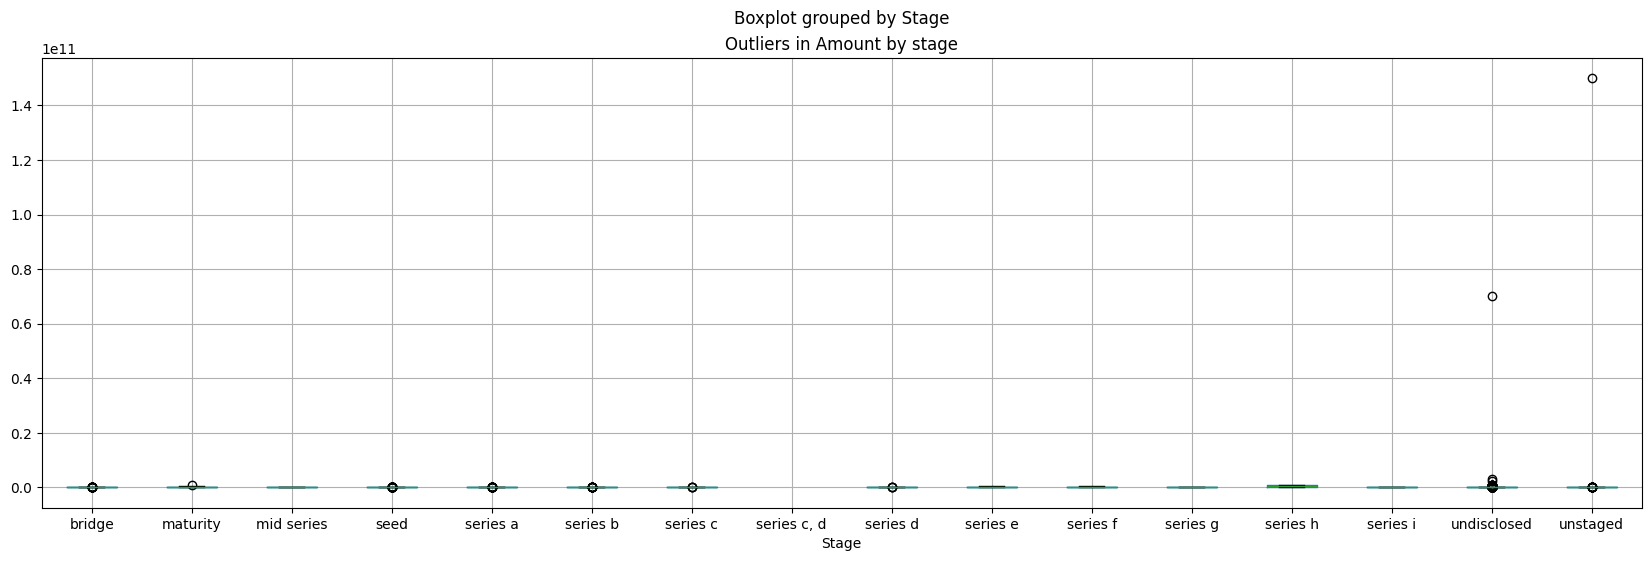

In [330]:
#visualise outliers per group
data.boxplot(column='Amount ($)', by='Stage', figsize=(20, 6))
plt.title('Outliers in Amount by stage');

Outilers present in undisclosed and unstaged amounts possibly because of wide varieties of start-up stages found in these groups due to their undefined descriptions.

In [331]:
#checking skewness of each group
groups  = data['Amount ($)'].groupby(data['Stage'])
groups.skew()

Stage
bridge           6
maturity         2
mid series     NaN
seed            14
series a         7
series b         3
series c         2
series c, d    NaN
series d         1
series e         1
series f         1
series g        -2
series h        -0
series i       NaN
undisclosed     27
unstaged        10
Name: Amount ($), dtype: object

Each column is significantly skewed mostly to the right.Therefore, using their means might not be the right aggregate for filling their missing values. 
- use median 

In [332]:
#check for missing values in amount by stage
data['Amount ($)'].isna().groupby(data['Stage']).sum()

Stage
bridge          82
maturity         3
mid series       0
seed           216
series a        15
series b         4
series c         4
series c, d      1
series d         0
series e         1
series f         0
series g         0
series h         0
series i         0
undisclosed    219
unstaged        11
Name: Amount ($), dtype: int64

In [333]:
#handle nulls
#find median amount of each stage 
#fill stage with median amount
undisclosed = data[data['Stage'] == 'undisclosed']['Amount ($)'].median()
#estimate for bridge stage
bridge = data[data['Stage'] == 'bridge']['Amount ($)'].median()
#estimate for maturity stage
maturity = data[data['Stage'] == 'maturity']['Amount ($)'].median()
#estimate for seed stage
seed = data[data['Stage'] == 'seed']['Amount ($)'].median()
#estimate for series a stage
A = data[data['Stage'] == 'series a']['Amount ($)'].median()
#estimate for series b stage
B = data[data['Stage'] == 'series b']['Amount ($)'].median()
#estimate for series c stage
C = data[data['Stage'] == 'series c']['Amount ($)'].median()
#estimate for series e stage
E = data[data['Stage'] == 'series e']['Amount ($)'].median()
#aestimate for undisclosed stage
undisclosed = data[data['Stage'] == 'undisclosed']['Amount ($)'].median()
#estimate for unstaged stage
unstaged = data[data['Stage'] == 'unstaged']['Amount ($)'].median()

In [334]:
# Define a mapping of stages to corresponding fill values
fill= {'bridge': bridge, 'maturity': maturity, 'seed': seed, 'series a': A, 'series b': B, 'series c': C, 'series e': E, 'undisclosed': undisclosed, 'unstaged': unstaged}

# Fill missing values based on stages
for stage, value in fill.items():
    data.loc[data['Stage'] == stage, 'Amount ($)'] = data.loc[data['Stage'] == stage, 'Amount ($)'].fillna(value)


In [335]:
#verify missing values in amount by stage
data['Amount ($)'].isna().groupby(data['Stage']).sum()

Stage
bridge         0
maturity       0
mid series     0
seed           0
series a       0
series b       0
series c       0
series c, d    1
series d       0
series e       0
series f       0
series g       0
series h       0
series i       0
undisclosed    0
unstaged       0
Name: Amount ($), dtype: int64

Series c,d was left out because:
- it occurred just once with a missing amount value
- does not fill the description of other stages (cant be re-grouped)
- decision to drop this entry

In [336]:
#filter out series c, d
data[data['Stage'] == 'series c, d']
#occurs at row 2021

,Company_Name,Founded,Location,Sector,What_It_Does,Founders,Investor,Amount ($),Stage,Year
2021,Peel Works,2010,Mumbai,Technology,E-commerce for corner/retail stores.,"Sachin Chhabra, Nidhi Ramachandran",CESC Ventures,NaN,"series c, d",2020-01-01


In [337]:
#drop row
data = data.drop(index = 2021)

#### Year

In [338]:
#check unique values in year
data['Year'].unique()

<DatetimeArray>
['2021-01-01 00:00:00', '2020-01-01 00:00:00', '2019-01-01 00:00:00',
 '2018-01-01 00:00:00']
Length: 4, dtype: datetime64[ns]

In [339]:
#check null values in year
data['Year'].isna().sum()


0

There are no missing values in year column

Cleaning of focus columns completed. Now drop unimportant columns
- Founded no longer need for filling of null values
- What is does is represented by Sector
- Founders has no bearing on my analysis
- Investors has no bearing on my analysis

In [340]:
#drop columns 'Founded', 'What_It_Does', 'Founders' and 'Investors'
data.drop(columns=['Founded', 'What_It_Does', 'Founders', 'Investor'], inplace= True)

In [341]:
#check shape of data
data.shape

(2854, 6)

In [342]:
#check duplicates
data.duplicated().sum()

18

In [343]:
#verify duplicates
data[data.duplicated()]

,Company_Name,Location,Sector,Amount ($),Stage,Year
258,Bizongo,Mumbai,Technology,100000000,series d,2021-01-01
299,Comofi Medtech,Bangalore,Technology,200000,undisclosed,2021-01-01
397,Siply,Bangalore,Finance,1000000,seed,2021-01-01
828,BharatPe,Delhi,Finance,6000000,unstaged,2021-01-01
1057,Ola Electric,Bangalore,Transport,200000000,undisclosed,2021-01-01
1316,Country Delight,Gurugram,Technology,25000000,series c,2020-01-01
1400,Jumbotail,Bangalore,Technology,11000000,series b,2020-01-01
1421,Genius Teacher,Mumbai,Technology,2000000,undisclosed,2020-01-01
1689,LEAD School,Mumbai,Technology,28000000,series c,2020-01-01
1699,FPL Technologies,Pune,Finance,10000000,series a,2020-01-01


In [344]:
#drop duplicates
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2836 entries, 0 to 2854
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Company_Name  2836 non-null   object        
 1   Location      2836 non-null   object        
 2   Sector        2836 non-null   object        
 3   Amount ($)    2836 non-null   object        
 4   Stage         2836 non-null   object        
 5   Year          2836 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 155.1+ KB


## Answering Analytical Questions

#### 1. What is the trend in the volume of funding yearly?

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

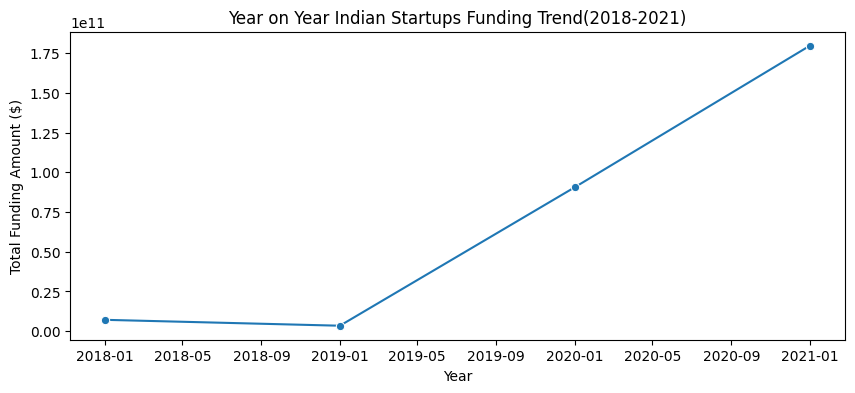

In [345]:
# Plotting the trend
#group amount by year
annual_funding = data.groupby('Year')['Amount ($)'].sum().reset_index()

#visualisation settings
plt.figure(figsize=(10, 4))
sb.lineplot(x='Year', y= 'Amount ($)', data=annual_funding, marker='o')
plt.title('Year on Year Indian Startups Funding Trend(2018-2021)')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount ($)');

Volume of Funding generally increases over the years.

#### Time
- H0: Average funding volume increases every year.
- H1: Average funding volume does not increase every year

Further test will have to be carried out as confirmation before we fail to reject our null hypothesis.

#### 2. What is the trend in funding per sector?

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


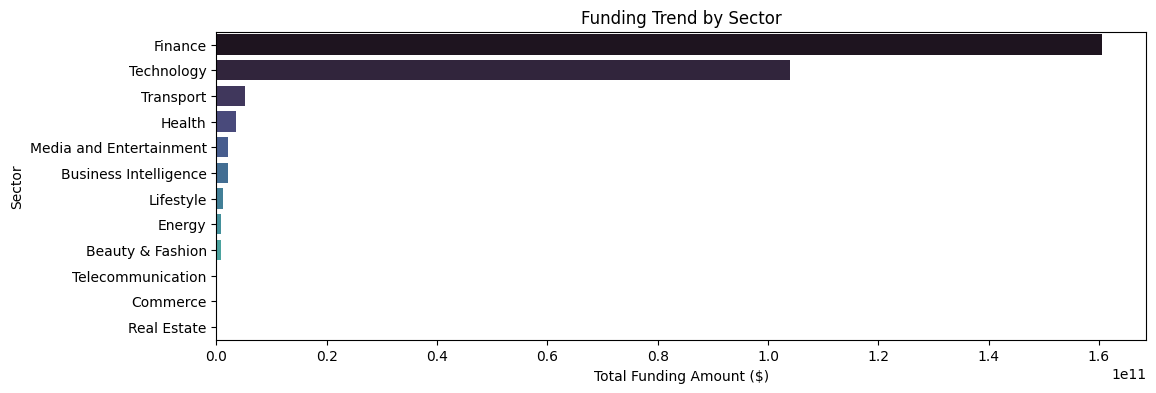

In [346]:
#plot a bar chart showing the total distribution of funding per sector
#group amount by sector
sector_money = data.groupby('Sector')['Amount ($)'].sum().sort_values(ascending = False)

#Visualisation setting
plt.figure(figsize=(12, 4))
sb.barplot(x=sector_money.values, y=sector_money.index, palette='mako')
plt.title('Funding Trend by Sector')
plt.xlabel('Total Funding Amount ($)')
plt.ylabel('Sector');


Finance and Technology sectors appear to receive the most funding

#### 3. Is the number of starts-ups receiving funding increasing with year?

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


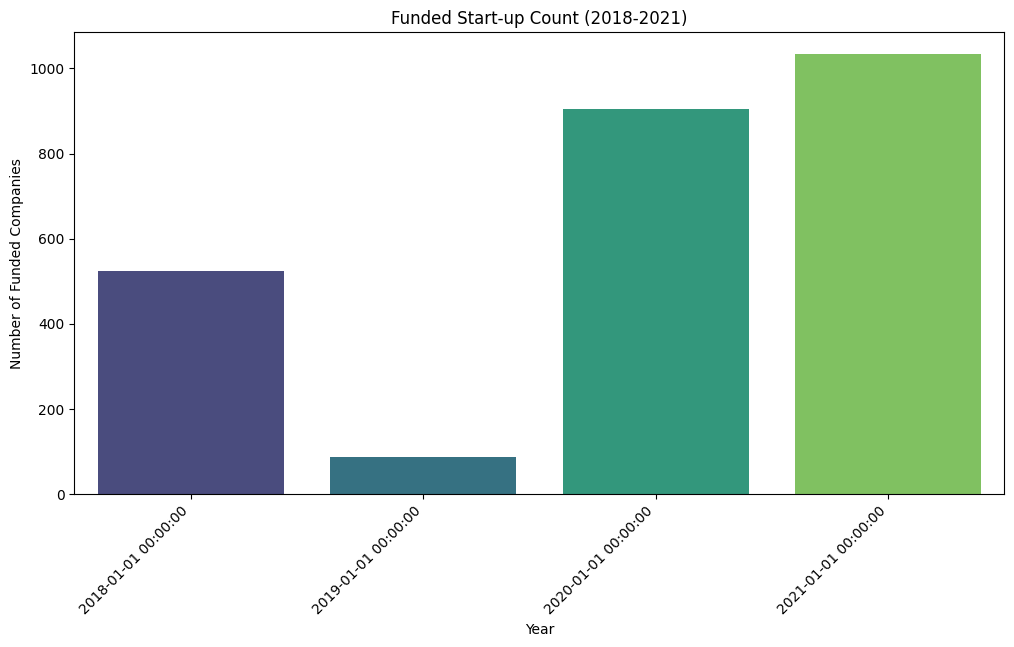

In [347]:
company_count = data['Company_Name'].groupby(data['Year']).nunique()
#company_count represents the unique count of companies receiving funding every year
company_count.sort_values(ascending = True)

# Plotting
plt.figure(figsize=(12, 6))
sb.barplot(x=company_count.index, y=company_count.values, palette='viridis')
plt.title('Funded Start-up Count (2018-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Funded Companies')
plt.xticks(rotation=45, ha='right');

Number of start-up businesses which have received funding have generally increased over the years.

#### 4. What is the relationship between number of start-ups and the amount of funding given per year?

In [348]:
#Calculate total funding per year
yearly_funding = data['Amount ($)'].groupby(data['Year']).sum()

#Calculate average funding received by each company per year
yearly_co_funding = yearly_funding / company_count
yearly_co_funding 


Year
2018-01-01    13554489
2019-01-01    39153692
2020-01-01   100136392
2021-01-01   174007099
dtype: object

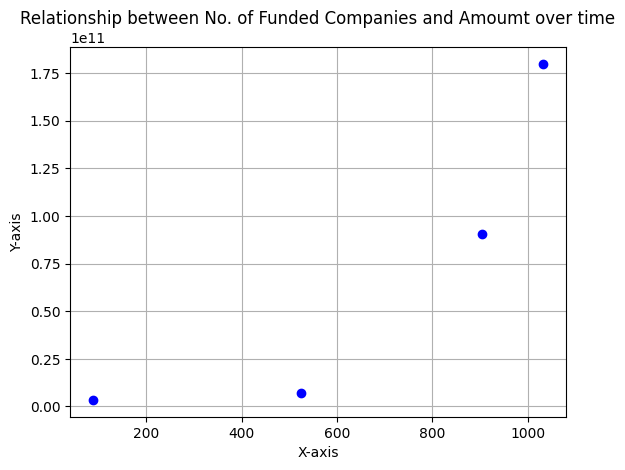

In [349]:
# Visualization setting
plt.scatter(company_count, yearly_funding, color='blue', marker='o')

# Set plot title and labels
plt.title('Relationship between No. of Funded Companies and Amoumt over time')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show grid
plt.grid(True)

In [350]:
#Calculate correlation between No. of Funded Companies and Amoumt over time
correlation = yearly_funding.corr(company_count)
correlation

0.8701449492576029

Although number of start-up receiving funding increases per year, the average volume of funding provided to each company generally increases.
Correlation between both variable shows a strong positive relationship between them. Meaning funding volume does decrease when the number of companies increase. 

#### 5. What is the trend of funding per location?

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


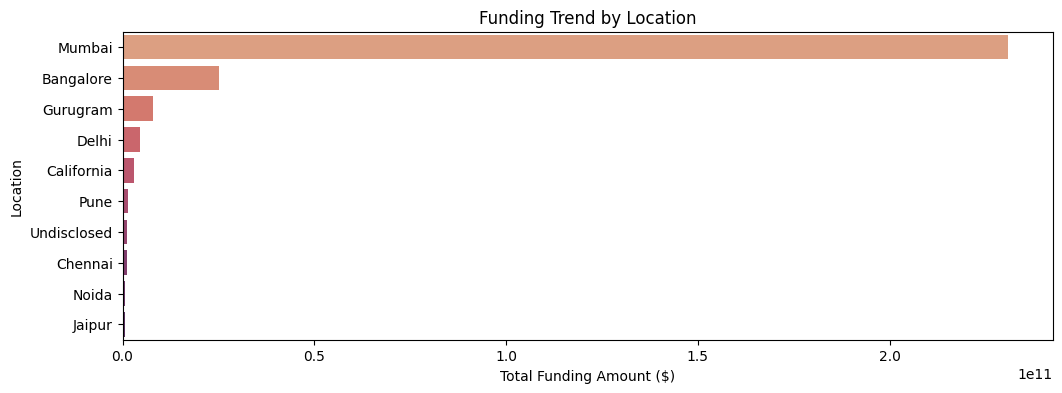

In [351]:
#plot a horizontal bar chart showing the total distribution of funding per location
#Group funding amount by location
location_money = data.groupby('Location')['Amount ($)'].sum().sort_values(ascending = False ).head(10)

#Visualisation setting
plt.figure(figsize=(12, 4))
sb.barplot(x=location_money.values, y=location_money.index, palette='flare')
plt.title('Funding Trend by Location')
plt.xlabel('Total Funding Amount ($)')
plt.ylabel('Location');

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


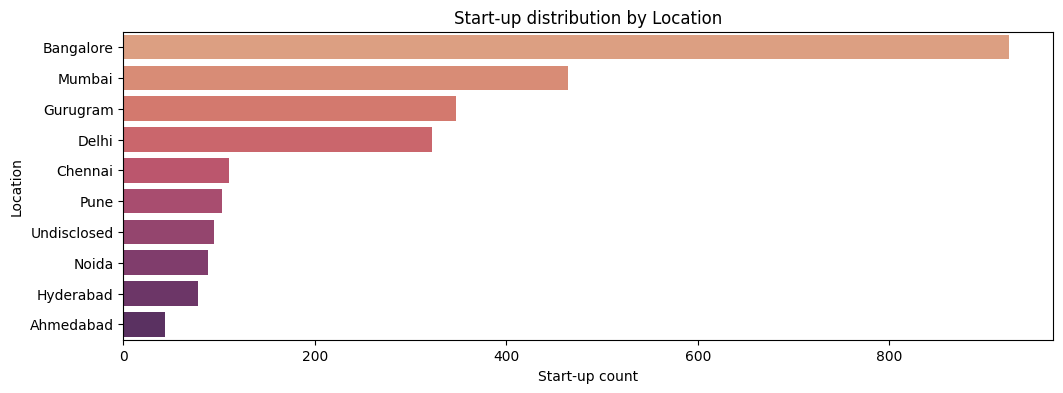

In [352]:
#plot a horizontal bar chart showing the total distribution of start-ups per location
#Get distribution of business locations
location = data['Location'].value_counts().sort_values(ascending = False ).head(10)

#Visualization settings
plt.figure(figsize=(12, 4))
sb.barplot(x=location.values, y=location.index, palette='flare')
plt.title('Start-up distribution by Location')
plt.xlabel('Start-up count')
plt.ylabel('Location');

High funding amounts in specific locations may indicate vibrant startup ecosystems or the presence of key industry players.
From the above two charts, Although Bangalore appears to be the hot-spot for opening start-ups, the arger chunk of funding seems to be awarded to start-ups in Mumbai then Bangalore and Gurugram in the descending order.

#### location
- H0: The location of the start-up has no impact on the volume of funding received.
- H1: The location of the start-up has an impact on the volume of funding received.

From here we will agree the the location of the start-up does impact the volume of funding received. Further test will have to be carried out before we reject our null hypothesis

#### 6. What is the trend of funding per stage of start-up?

In [353]:
#filter out rows with undisclosed or unstaged classification
filtered_stage = data[~data['Stage'].isin(['undisclosed', 'unstaged'])]

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


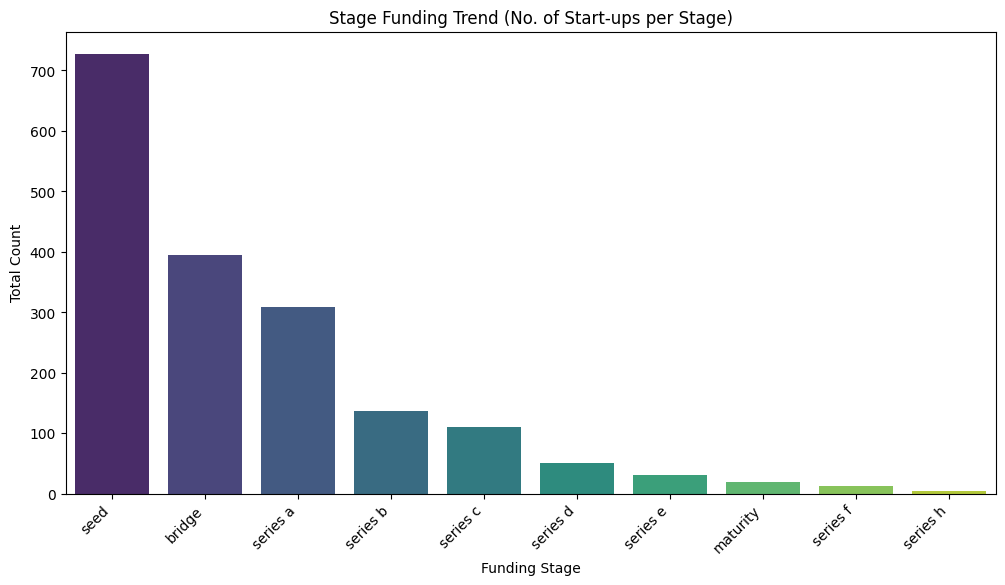

In [354]:
# Group by Stage and calculate the sum of Amount
stage_distribution = filtered_stage['Stage'].value_counts()

# Select top 10 funding stages
top_10_stages = stage_distribution.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sb.barplot(x=top_10_stages.index, y=top_10_stages.values, palette='viridis')
plt.title('Stage Funding Trend (No. of Start-ups per Stage)')
plt.xlabel('Funding Stage')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right');

- Exclusion: Undisclosed and Unstaged
- Majority of of the start-up companies came in for funding in the early stages of their growth cycle.
- Understanding which stages attract more funding can provide insights into the competitive landscape and aid our decision as startups 

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


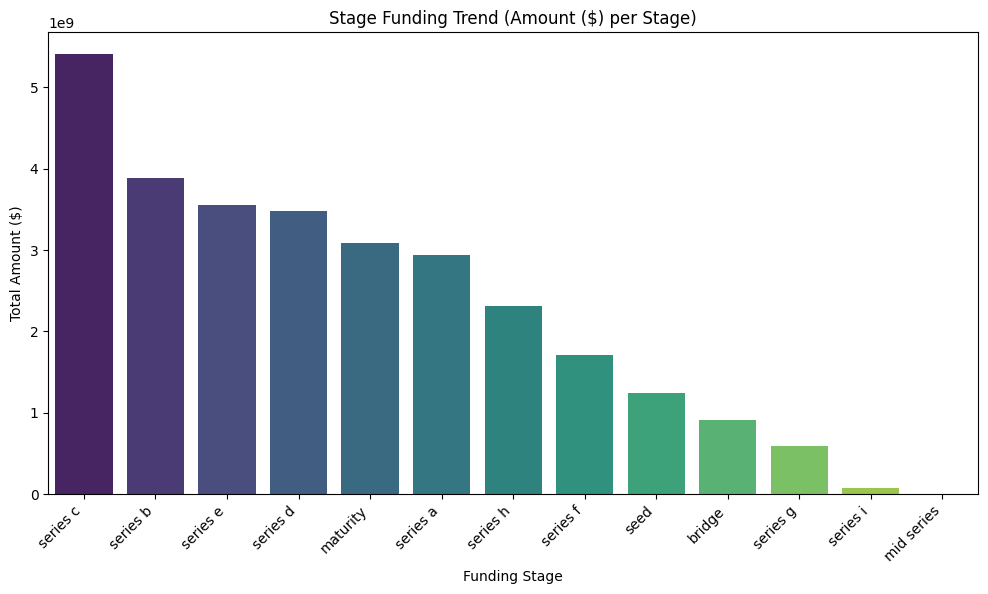

In [355]:
# Group by Stage and calculate the sum of Amount
total_amount_by_stage = filtered_stage.groupby('Stage')['Amount ($)'].sum().sort_values(ascending=False)

# Select top 10 funding stages
top_stages = total_amount_by_stage

# Plotting
plt.figure(figsize=(12, 6))
sb.barplot(x=top_stages.index, y=top_stages.values, palette='viridis')
plt.title('Stage Funding Trend (Amount ($) per Stage)')
plt.xlabel('Funding Stage')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45, ha='right')  

# Show the plot
plt.show()

Although distribution of start-up by the stage is skewed towards of the seed and bridge stages. they still do not make the chunk of the Funding amount that comes in. This might be because the amount ranges designated for funding of the start- up varies for every stage and usually increases as your go up the growth cycle.


#### Stage of start up
- H0: The stage of the start-up informs the amount of funding received.
- H1: The stage of the start-up does not inform the amount of funding received.

It can therefore be agreed upon that, the stage of the start-up does inform the amount of funding received. Further test will have to be carried out before we reject our null hypothesis.

## Proposed Strategy
 For this team, I propose diversified venture into any of the top 3 sectors exhibiting long-term growth potential(Finance,Tech, or Transport) in any of the 3 vibrant business centres (Mumbai, Bangalore, Gurugram). Although competitive in nature, these sectors and locations gurantee a ready-market, trigger innovation and overgrowth of the venture.

## Data Extraction

In [356]:
#extract data into csv file
data.to_csv('Startup_india.csv', index=False)

In [357]:

#visualised on powerbi
#edit readme